# 環境構築

In [1]:
# !pip install keras-tuner --upgrade

In [12]:
pip list

Package                       Version
----------------------------- ------------------------
absl-py                       1.0.0
alembic                       1.8.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
astunparse                    1.6.3
attrs                         22.1.0
autopage                      0.5.1
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.2.0
certifi                       2022.6.15
cffi                          1.15.1
charset-normalizer            2.1.0
clang                         13.0.1
click                         8.0.4
cliff                         4.0.0
cloudpickle                   2.1.0
cmaes                         0.8.2
cmake-setuptools              0.1.3
cmd2                          2.4.2
colorlog                      6.7.0
cuda-python                   11.6.0
cudf                          22

# ライブラリのインポート

### ローカル用

In [1]:
!pwd

/mnt/MachineLearning/MLTrial


In [3]:
import pprint
import sys
sys.path.append("/mnt/MachineLearning")
# sys.path.append("/home/i9-10920x/anaconda3/pkgs/tensorflow-base-2.8.1-cuda110py39h0baf056_0/lib/python3.9/site-packages")
# sys.path.append("/home/i9-10920x/anaconda3/pkgs/tensorflow-base-2.9.1-mkl_py310h353358b_0/lib/python3.10/site-packages")
pprint.pprint(sys.path)

['/mnt/MachineLearning/MLTrial',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/mnt/MachineLearning']


In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import cv2
from scipy import interpolate
from modules import show_mod

In [5]:
#読み込むデータのパスの設定
current_dir_path = os.getcwd()
data_path = os.path.join(current_dir_path,"/mnt/MachineLearning/data")
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")
output_list = glob.glob(data_path+"/*"+"/RiskOfInfection"+"/*"+"/risk_dist.csv")
num_input = len(input_list)
num_output = len(output_list)

# データの前処理

## データの読み込み

In [7]:
#inputの読み込み
df_input = {}
for i in range(int(num_input)):
    input_fname = input_list[i]
    df_input[i] = pd.read_csv(input_fname, index_col="case_name")

df_input = pd.concat([df_input[i] for i in range(int(num_input))])
df_input

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office22_360_164_bout,360,164,b,3.57,4.235,1.255,270.0,5.02,4.235,1.255,...,1.255,90.0,5.63,2.315,1.255,90.0,8.5,6.5,4.25,3.25
office22_660_246_aout,660,246,a,3.57,4.235,1.255,270.0,5.02,4.235,1.255,...,1.255,90.0,5.63,2.315,1.255,90.0,8.5,6.5,4.25,3.25
office22_660_82_bout,660,82,b,3.57,4.235,1.255,270.0,5.02,4.235,1.255,...,1.255,90.0,5.63,2.315,1.255,90.0,8.5,6.5,4.25,3.25
office22_660_82_aout,660,82,a,3.57,4.235,1.255,270.0,5.02,4.235,1.255,...,1.255,90.0,5.63,2.315,1.255,90.0,8.5,6.5,4.25,3.25
office22_660_164_bout,660,164,b,3.57,4.235,1.255,270.0,5.02,4.235,1.255,...,1.255,90.0,5.63,2.315,1.255,90.0,8.5,6.5,4.25,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office2_960_164_bout,960,164,b,3.78,1.265,1.255,90.0,4.76,2.740,1.255,...,1.255,0.0,2.84,3.140,1.255,0.0,6.0,5.5,3.00,2.75
office2_360_246_aout,360,246,a,3.78,1.265,1.255,90.0,4.76,2.740,1.255,...,1.255,0.0,2.84,3.140,1.255,0.0,6.0,5.5,3.00,2.75
office2_360_164_bout,360,164,b,3.78,1.265,1.255,90.0,4.76,2.740,1.255,...,1.255,0.0,2.84,3.140,1.255,0.0,6.0,5.5,3.00,2.75


In [8]:
#排気口位置a,b,offをダミー変数化
dummies = pd.get_dummies(df_input['exhaust'])
df_input.drop("exhaust", axis=1, inplace=True)
df_input = pd.concat([df_input, dummies], axis=1)
df_input = df_input.reindex(columns=['aircon','ventilation','a','b','off'
          ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
          ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
          ,"aircon_position_x","aircon_position_y"])

In [12]:
#outputの読み込み
num_row = np.empty((num_output))
num_column = np.empty((num_output))
for i in range(num_output):
    np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    num_row[i] = np_temp.shape[0]
    num_column[i] = np_temp.shape[1]
    
max_num_row = int(max(num_row))
max_num_column = int(max(num_column))

## 補間法を用いたデータのリサイズ

In [ ]:
#bilinear method
def resize_bilinear(src, row, column):
    reszd = np.empty((row, column))
    scale_row = row / src.shape[0]
    scale_column = column / src.shape[1]
    
    for yd in range(row):
        for xd in range(column):
            x, y = xd / scale_column, yd / scale_row
            ox, oy = int(x), int(y)
                        
            if ox > src.shape[1] - 2:
                ox = src.shape[1] - 2
                x -= 1
            if oy > src.shape[0] - 2:
                oy = src.shape[0] - 2
                y -= 1
            
            dx = x - ox
            dy = y - oy
            
            reszd[yd, xd] = (1 - dx) * (1 - dy) * src[oy, ox] + dx * (1 - dy) * src[oy, ox + 1] + \
            (1 - dx) * dy * src[oy + 1, ox] + dx * dy * src[oy + 1, ox + 1]
            
    return reszd

In [ ]:
#データのリサイズ（自作のバイリニア補間）
np_output = np.empty((num_output, max_num_row, max_num_column))
for i in range(num_output):
    np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    np_reszd =  resize_bilinear(np_temp, max_num_row, max_num_column)
    np_output[i] = np_reszd

In [ ]:
#OpenCVによるデータのリサイズ、現状使っていない

# for i in range(num_output):
#     np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
#     scale_row = max_num_row / np_temp.shape[0]
#     scale_column = max_num_column / np_temp.shape[1]
#     np_resz = cv2.resize(np_temp, (np_temp.shape[1]*scale_column, np_temp.shape[0]*scale_row), interpolation=cv2.INTER_LINEAR)

## パディングによるリサイズ

In [13]:
#−１パディングでサイズ合わせ
np_output = np.empty((num_output, max_num_row, max_num_column))
for i in range(num_output):
    np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    np_padding = np.pad(array=np_temp, pad_width=[(0, max_num_row - np_temp.shape[0]), (0,  max_num_column - np_temp.shape[1])],\
                        mode="constant", constant_values = (-1) )
    np_output[i] = np_padding

In [ ]:
# nanパディングの遺産
# np_output = np.empty((max_num_row, max_num_column))
# for i in range(num_output):
#     np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    
#     if np_temp.shape[0] < max_num_row :
#         nan = np.empty((max_num_row - int(np_temp.shape[0]), max_num_column))
#         nan[max_num_row - int(np_temp.shape[0]), max_num_column] = np.nan
#         np.insert(np_temp, int(np_temp.shape[0]) + 1 : max_num_row, :] = np.nan
#     if np_temp.shape[1] < max_num_column :
#         np_temp[:, int(np_temp.shape[1]) + 1:] = np.nan 
    
#     np_output = np.append(np_output, np_temp, axis=0)
    
# output = []
# for i in range(num_output):
#     with open (output_list[i], "r") as csv_fname:
#         reader = csv.reader(csv_fname)
#         temp_list = [row for row in reader]
#         output.append(temp_list)

## outputデータの確認

In [14]:
output_list[25]

'/mnt/MachineLearning/data/office2/RiskOfInfection/960_164_aout/risk_dist.csv'

In [15]:
np_temp = np.loadtxt(output_list[25], delimiter=",", dtype=np.float32)

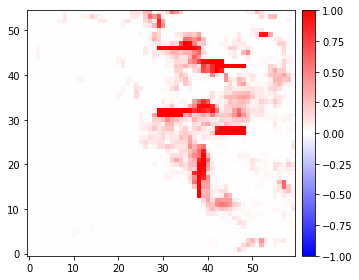

In [16]:
show_mod.show_image(np_temp ,cbar=True)

In [17]:
#ケース名の取得
case_name_list = []
for path_name in output_list:
    path_name_list = path_name.split('/')#ディレクトリ名を区切り文字単位で切り取ってリストに格納
    case_name_list.append(path_name_list[-4] + "_" +path_name_list[-2])

In [3]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
# cmap = show_mod.make_colormap(["blue", "white", "red"])
cmap = show_mod.make_colormap(["black", "white"])

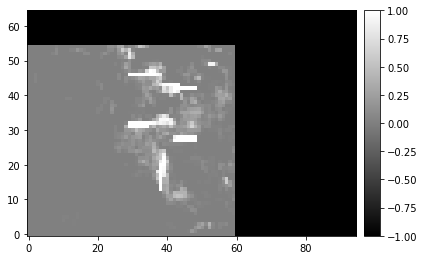

In [19]:
#選んだ1個をプロット
show_mod.show_image(np_output[25], cbar=True, cmap=cmap)

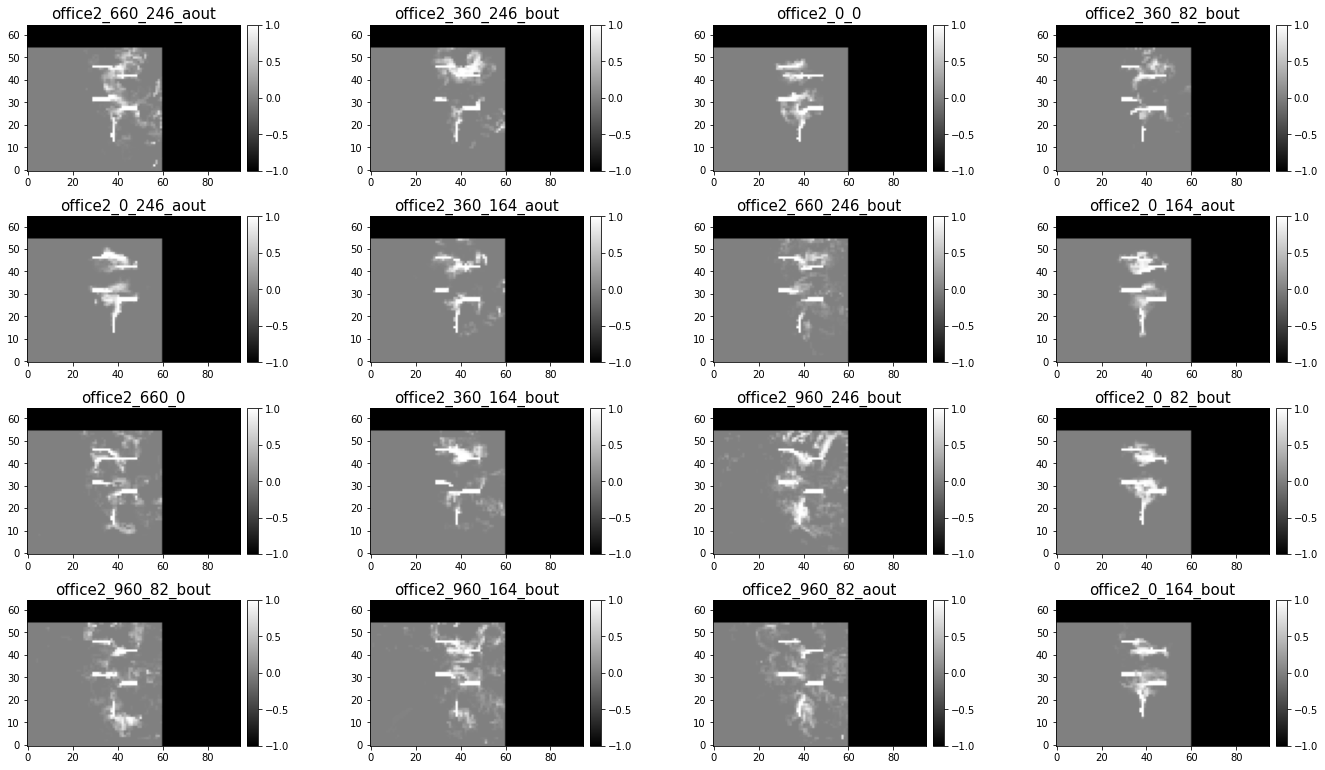

In [20]:
#複数プロット
show_mod.show_images(np_output, title_name=case_name_list, row=4, column=4, cbar=True, cmap=cmap)

## 機械学習を行うための前処理

In [4]:
from sklearn import preprocessing

In [22]:
df_input

,aircon,ventilation,a,b,off,1_x,1_y,1_z,1_angle,2_x,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office2_960_164_aout,960,164,1,0,0,3.780,1.265,1.255,90.0,4.76,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_82_bout,960,82,0,1,0,3.780,1.265,1.255,90.0,4.76,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_246_bout,960,246,0,1,0,3.780,1.265,1.255,90.0,4.76,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_660_164_bout,660,164,0,1,0,3.780,1.265,1.255,90.0,4.76,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_0_164_bout,0,164,0,1,0,3.780,1.265,1.255,90.0,4.76,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office28_960_82_bout,960,82,0,1,0,1.265,3.820,1.255,0.0,2.93,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_660_0,660,0,0,0,1,1.265,3.820,1.255,0.0,2.93,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_360_246_aout,360,246,1,0,0,1.265,3.820,1.255,0.0,2.93,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00


In [23]:
#入力データの選択(オフィスサイズとエアコン位置が被っていると思うので削除)
df_input.drop(df_input.columns[27:], axis=1, inplace=True)

In [24]:
#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_input)
input_std = stdscaler.transform(df_input)
df_input_std = df_input.copy()
for i in range(int(input_std.shape[1])):
    df_input_std.iloc[:, i] = input_std[:, i]

In [25]:
#output 3D to 2D
df_output_2D = pd.DataFrame(np_output.reshape(-1, max_num_row*max_num_column))
df_output_2D.set_axis(case_name_list, axis=0, inplace=True)#case_name to index
df_output_2D = df_output_2D.reindex(index=df_input.index)#input.index = output.index
df_output_2D.shape

(263, 6175)

# 機械学習の実装

In [26]:
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"#0でオフ1でオン
os.environ["CUDA_VISIBLE_DEVICES"] = "0"#-1でオフgpu番号で使用するgpu指定

In [5]:
#機械学習の実装
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from keras.layers.convolutional import Conv2DTranspose, Conv2D
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import losses
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
# import keras_tuner as kt
import IPython

2022-10-11 08:58:28.656056: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## GPUの確認

In [ ]:
## keras をインポート
import tensorflow as tf
from tensorflow import keras as kr
## 結果の評価　数値計算用
import numpy as np

## trainX 学習用データ、trainY 正解データ、testX テスト用データ、testY 正解データ
(trainX, trainY), (testX, testY) = kr.datasets.mnist.load_data()

## 形式変換
# テストデータを変換
trainX = trainX.reshape(60000, 784)
trainX = trainX/255.
testX = testX.reshape(10000, 784)
testX = testX/255.
# 正解データを変換
trainY = kr.utils.to_categorical(trainY, 10)
testY = kr.utils.to_categorical(testY, 10)

## モデル構築
# 中間層１層　全結合型
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=256, input_shape=(784,), activation='relu'))
model.add(kr.layers.Dropout(0.5))

# 出力層
model.add(kr.layers.Dense(units=10, activation='softmax'))

## 学習
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=100, epochs=20, validation_split=0.1, verbose=1)

## テスト
result = model.predict(testX)

## 結果を表示
pred = np.array(result).argmax(axis=1)
print(pred)
label=testY.argmax(axis=1)
print(label)
accuracy = np.mean(pred == label, axis=0)
print(accuracy)

## トレーニング，テストデータの振り分け

In [28]:
np.random.seed(123)
tf.random.set_seed(123)

In [29]:
#特定のofficeだけテストデータにする
target_office_name = ["office1", "office2", "office3"]
#正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
office_list = df_input_std.index.str.extract("(office+[0-9]{1,2})").to_numpy()
#リスト内包表記
test_data_index = [i for i in range(office_list.shape[0]) if any(office_list[i] == target_office_name)]
#test_data_index以外をtrain_data_indexとする
train_data_bool = np.ones(office_list.shape[0], dtype = bool)
train_data_bool[test_data_index] = False
train_data_index = np.arange(office_list.shape[0])[train_data_bool]

In [30]:
#トレーニングデータ、テストデータの振り分け
train_data = df_input_std.iloc[train_data_index]
test_data = df_input_std.iloc[test_data_index]
train_target = df_output_2D.iloc[train_data_index]
test_target = df_output_2D.iloc[test_data_index]

In [31]:
#トレーニングデータをシャッフルしておかないとk分割交差検証の精度がおかしくなる
train_data = train_data.sample(frac = 1, random_state = 0)
train_target = train_target.sample(frac = 1, random_state = 0)

In [32]:
y_test_office_size = int(num_row[test_data_index[1]])
x_test_office_size = int(num_column[test_data_index[1]])
output_size = x_test_office_size*y_test_office_size

## 単純な回帰モデル

In [33]:
#モデルのビルド
def build_model(train_data, optimizer, output_size):
    model = keras.Sequential()
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
#     model.add(Dense(64, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001)))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))
    model.add(Dense(output_size, kernel_initializer="he_normal"))
    model.build(input_shape=(train_data.shape))
    model.summary()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [ ]:
#全データを使って訓練してみる
optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.99)
model = build_model(train_data, optimizer, max_num_column*max_num_row)
# model.fit(train_data, train_target, epochs=500, batch_size=16, verbose=1)
es = EarlyStopping(monitor="val_mae", patience=100, verbose=0)#定めたパラメータの最小値更新が行われなければ打ち切り
hist = model.fit(train_data, train_target, epochs=3000, batch_size=16, verbose=1, validation_data=(test_data, test_target), callbacks=[es])
val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
print('test_mse: {:.4f}, test_mae: {:.4f}'.format(val_mse, val_mae))

## keras_tunerを導入した回帰モデル

In [ ]:
#keras_tunerを使用したハイパーパラメータ調整
def build_model(hp):
    model = keras.Sequential()
    
    hp_num_Dense = hp.Int("num_Dense", min_value=2, max_value=5, step=1)
    hp_Dropout_switch = hp.Choice("Dropout_switch", values=[True, False])
    
    if (hp_Dropout_switch):
        for i in range(hp_num_Dense):
            hp_units = hp.Int("units", min_value=32, max_value=128, step=32)
            hp_Dropout_rate = hp.Choice("rate", values=[0.3, 0.4, 0.5])
            model.add(Dense(units=hp_units, kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation("relu"))
            model.add(Dropout(rate=hp_Dropout_rate))
    else:
        for i in range(hp_num_Dense):
            hp_units = hp.Int("units", min_value=32, max_value=128, step=32)
            model.add(Dense(units=hp_units, kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation("relu"))
    
    model.add(Dense(max_num_column*max_num_row, kernel_initializer="he_normal"))
    
    hp_learning_rate = hp.Choice("learning_rate", values=[1.e-2, 1.e-3, 1.e-4])
    model.compile(optimizer=optimizers.RMSprop(learning_rate=hp_learning_rate, rho=0.99), loss='mse', metrics=['mae'])
    return model

In [ ]:
#keras_tunerのログが残っていれば削除
import shutil
output_log_path = "output_log/"

if os.path.exists(output_log_path):
    shutil.rmtree(output_log_path)

#tunerのインスタンス化
tuner = kt.Hyperband(build_model, objective="val_mae", max_epochs=500, directory="output_log")

In [ ]:
#トレーニングステップごとにトレーニング出力をクリアにするコールバック
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait=True)

In [ ]:
tuner.search(train_data, train_target, epochs=500, batch_size=32,
             validation_data=(test_data, test_target), callbacks=[ClearTrainingOutput()])

In [ ]:
#チューニングによって得られたベストなハイパーパラメータ
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Dropout_switch is {best_hps.get("Dropout_switch")}\n
num_Dense is {best_hps.get("num_Dense")}\n
units is {best_hps.get("units")}\n
Dropout_rate is {best_hps.get("rate")}\n
learning_rate is {best_hps.get("learning_rate")}
        """)

In [ ]:
#最適なハイパーパラメータでモデルをビルドしてみる
model = tuner.hypermodel.build(best_hps)
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#全データを使って学習
es = EarlyStopping(monitor="val_mae", patience=100, verbose=0)#定めたパラメータの最小値更新が行われなければ打ち切り
hist = model.fit(train_data, train_target, epochs=3000, batch_size=32, verbose=1, validation_data=(test_data, test_target), callbacks=[es])
val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
print('test_mse: {:.4f}, test_mae: {:.4f}'.format(val_mse, val_mae))

## 転置畳み込み層のみのモデル

In [ ]:
#DCGANの生成器のみ作ってみる
def build_generator(input_dim, optimizer):
    model = keras.Sequential()
    
    #全結合層と形状直し
    model.add(Dense(256 * 7 * 7, input_dim=input_dim))
    model.add(Reshape((7, 7, 256)))
    
    #転置畳み込み層１
    model.add(Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層2
    model.add(Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層3
    model.add(Conv2DTranspose(16, kernel_size=(3,3), strides=(2,3), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層4
    model.add(Conv2DTranspose(8, kernel_size=(5,5), strides=(1,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層5
    model.add(Conv2DTranspose(8, kernel_size=(3,4), strides=(1,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層6
    model.add(Conv2DTranspose(1, kernel_size=(4,5), strides=(1,1)))
    model.add(Activation("tanh"))
    
    model.summary()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [ ]:
#target 2D to 3D
train_target_2D = train_target.to_numpy()
train_target_3D = train_target_2D.reshape(-1, max_num_row, max_num_column, 1)
test_target_2D = test_target.to_numpy()
test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column, 1)
test_target_3D.shape

(28, 65, 95, 1)

In [ ]:
#全データを使用してモデルの学習
# optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.99)
optimizer = optimizers.Adam(learning_rate=0.001)
model = build_generator(input_dim=train_data.shape[1], optimizer=optimizer)
es = EarlyStopping(monitor="val_mae", patience=100, verbose=0)#定めたパラメータの最小値更新が行われなければ打ち切り
hist = model.fit(train_data, train_target_3D, epochs=1000, batch_size=16, verbose=1, validation_data=(test_data, test_target_3D), callbacks=[es])
val_mse, val_mae = model.evaluate(test_data, test_target_3D, verbose=0)
print('test_mse: {:.4f}, test_mae: {:.4f}'.format(val_mse, val_mae))

## DCGAN（深層畳み込みGAN）

### mnistでテスト


In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-10-11 08:58:35.143098: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-11 08:58:35.411826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1931] Ignoring visible gpu device (device: 1, name: Quadro P1000, pci bus id: 0000:65:00.0, compute capability: 6.1) with core count: 5. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2022-10-11 08:58:35.718422: I tensorflow/core/common_runtime/gpu/gpu_process_state.cc:222] Using CUDA malloc Async allocator for GPU: 0
2022-10-11 08:58:35.718542: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 9522 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 30

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4940985451263868333
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9985261568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8320315416279308448
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:17:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [21]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1156003501463274087
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9990242304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3530556062675012818
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:17:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-10-08 09:07:00.433667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1931] Ignoring visible gpu device (device: 1, name: Quadro P1000, pci bus id: 0000:65:00.0, compute capability: 6.1) with core count: 5. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2022-10-08 09:07:00.434472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 9527 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:17:00.0, compute capability: 8.6


In [7]:
#生成器に与えるランダムな数列
ran_normal_dim = 20

In [152]:
#DCGANの生成器(mnist用)
def build_generator(input_dim):

    model = Sequential()

    # Reshape input into 7x7x256 tensor via a fully connected layer
    model.add(Dense(256 * 7 * 7, input_dim=input_dim))
    model.add(Reshape((7, 7, 256)))

    # Transposed convolution layer, from 7x7x256 into 14x14x128 tensor
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))

    # Transposed convolution layer, from 14x14x128 to 14x14x64 tensor
    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))

    # Transposed convolution layer, from 14x14x64 to 28x28x1 tensor
    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))

    # Output layer with tanh activation
    model.add(Activation('tanh'))

    return model

In [153]:
#DCGANの識別器
def build_discriminator(input_dim):

    model = Sequential()

    # Convolutional layer, from 28x28x1 into 14x14x32 tensor
    model.add(
        Conv2D(32,
               kernel_size=3,
               strides=2,
               input_shape=input_dim,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dropout(0.5))

    # Convolutional layer, from 14x14x32 into 7x7x64 tensor
    model.add(
        Conv2D(64,
               kernel_size=3,
               strides=2,
               input_shape=input_dim,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dropout(0.5))

    # Convolutional layer, from 7x7x64 tensor into 3x3x128 tensor
    model.add(
        Conv2D(128,
               kernel_size=3,
               strides=2,
               input_shape=input_dim,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))

    # Output layer
    model.add(Flatten())
    model.add(Dense(1))
    
    # Output layer with sigmoid activation
    model.add(Activation('sigmoid'))

    return model

In [154]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [155]:
#mnistでテストしてみる
from keras.datasets import mnist
img_rows = 28
img_columns = 28
channels = 1
img_shape = (img_rows, img_columns, channels)

(x_train, _), (_, _) = mnist.load_data()
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=3)

In [109]:
len(x_train)

60000

In [110]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


In [156]:
# Build and compile the Discriminator
metrics_d = metrics.BinaryAccuracy(threshold=0.5)
optimizer_d = optimizers.Adam(learning_rate=0.001)
discriminator = build_discriminator(img_shape)
discriminator.trainable = True
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizer_d,
                      metrics=metrics_d)
discriminator.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_112 (LeakyReLU)  (None, 14, 14, 32)       0         
                                                                 
 dropout_52 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_79 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_86 (Bat  (None, 7, 7, 64)         256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_113 (LeakyReLU)  (None, 7, 7, 64)         0         
                                                     

In [157]:
# Build the Generator
generator = build_generator(ran_normal_dim)
generator.summary()

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
optimizer_g = optimizers.Adam(learning_rate=0.001)
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=optimizer_g)
gan.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 12544)             263424    
                                                                 
 reshape_17 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_51 (Conv2D  (None, 14, 14, 128)      295040    
 Transpose)                                                      
                                                                 
 batch_normalization_88 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_115 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                                 
 conv2d_transpose_52 (Conv2D  (None, 14, 14, 64)     

現在ganの学習において問題が発生している．\
discriminatorのみの学習ではちゃんとreal,fakeを判別できているが\
ganの学習になると，discriminatorの予測値がおかしくなっている気がする．（現象としてはfakeに1，realに0のラベルをつけようとしている）\
このことからganの学習時にdiscriminatorを同時に訓練してしまっている（fakeに1のラベルをつけるように訓練）のではないかと疑った．\
しかし重みを訓練中に監視してみたところそのような問題は発生していなかった．\
他にも色々調査したがあとはtrain_on_batchがおかしい以外考えられない

In [158]:
losses_check = []
accuracies_check = []
iteration_checkpoints = []


def train(train_data, input_dim, iterations, batch_size, sample_interval):

# #     Labels for real images: all ones
#     real = np.ones((batch_size, 1))

# #     Labels for fake images: all zeros
#     fake = np.zeros((batch_size, 1))

#     # Labels for real images: all ones
#     real = np.ones(batch_size)

#     # Labels for fake images: all zeros
#     fake = np.zeros(batch_size)

#     Labels for real images: all ones
    real = tf.constant(1, shape=[batch_size, 1])

#     Labels for fake images: all zeros
    fake = tf.constant(0, shape=[batch_size, 1])

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------
        
        if (iteration % 2 == 0):
            # Get a random batch of real images
            idx = np.random.randint(0, train_data.shape[0], batch_size)
            imgs = train_data[idx]

            # Generate a batch of fake images
            z = np.random.normal(0, 1, (batch_size, input_dim))
            gen_imgs = generator.predict(z, verbose=0)

            # Train Discriminator
            d_loss_real = discriminator.train_on_batch(imgs, real, reset_metrics=True)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fake, reset_metrics=True)
#             d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, input_dim))

        # Train Generator
        g_loss = gan.train_on_batch(z, real)
        


        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
#             losses_check.append((d_loss, g_loss))
#             accuracies_check.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output result
            d_pred = discriminator.predict(gen_imgs)
            print(f"discriminator result(fake):{d_pred[:15,:]}")
            m = tf.keras.metrics.BinaryAccuracy()
            m.update_state(fake, d_pred)
            print(f"確認(fake):{m.result().numpy()}")
            d_pred = discriminator.predict(imgs)
            print(f"discriminator result(real):{d_pred[:15,:]}")
            m = tf.keras.metrics.BinaryAccuracy()
            m.update_state(real, d_pred)
            print(f"確認(real):{m.result().numpy()}")
#             gan_pred = gan.predict(z)
#             print(f"gan discriminator result(fake):{gan_pred[:,:]}")

            # Output training progress
            print(f"{iteration + 1} \n [D loss fake:{d_loss_fake[0]}, acc fake:{d_loss_fake[1]}] \n [D loss real:{d_loss_real[0]}, acc real:{d_loss_real[1]}] \n [G loss: {g_loss}]")

            
            # Output a sample of generated image
#             sample_images(generator)
            gen_imgs = generator.predict(z)
            gen_imgs_3D = gen_imgs.reshape(-1 , img_rows, img_columns)
            show_mod.show_images(gen_imgs_3D, row=4, column=4, cmap=cmap, cbar=True)
            
            #重みの監視
            print(f"discriminator weights:{discriminator.layers[11].get_weights()[0]}")
            print(f"gan weights:{gan.layers[1].layers[11].get_weights()[0]}")

In [159]:
discriminator.train_on_batch?

Signature:
discriminator.train_on_batch(
    x,
    y=None,
    sample_weight=None,
    class_weight=None,
    reset_metrics=True,
    return_dict=False,
)
Docstring:
Runs a single gradient update on a single batch of data.

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
          (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
          (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
          if the model has named inputs.
    y: Target data. Like the input data `x`, it could be either Numpy
      array(s) or TensorFlow tensor(s).
    sample_weight: Optional array of the same length as x, containing
      weights to apply to the model's loss for each sample. In the case of
      temporal data, you can pass a 2D array with shape (samples,
      sequence_length), to apply a different weight to every timestep of
      every sample.


8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.4840228 ]
 [0.52278733]
 [0.46314868]
 [0.46008185]
 [0.55803245]
 [0.5293136 ]
 [0.4962413 ]
 [0.4893024 ]
 [0.3971058 ]
 [0.3577098 ]
 [0.45077127]
 [0.52335733]
 [0.61639696]
 [0.46817395]
 [0.46320012]]
確認(fake):0.625
8/8 [==============================] - 0s 2ms/step
discriminator result(real):[[0.5204806 ]
 [0.47496372]
 [0.38458368]
 [0.34532362]
 [0.3964935 ]
 [0.38971972]
 [0.25030184]
 [0.49535844]
 [0.4834096 ]
 [0.24597542]
 [0.39558896]
 [0.37603614]
 [0.3757978 ]
 [0.5201674 ]
 [0.38057104]]
確認(real):0.1640625
100 
 [D loss fake:0.5515428185462952, acc fake:0.72265625] 
 [D loss real:1.3595706224441528, acc real:0.28125] 
 [G loss: 0.9299739599227905]
8/8 [==============================] - 0s 3ms/step


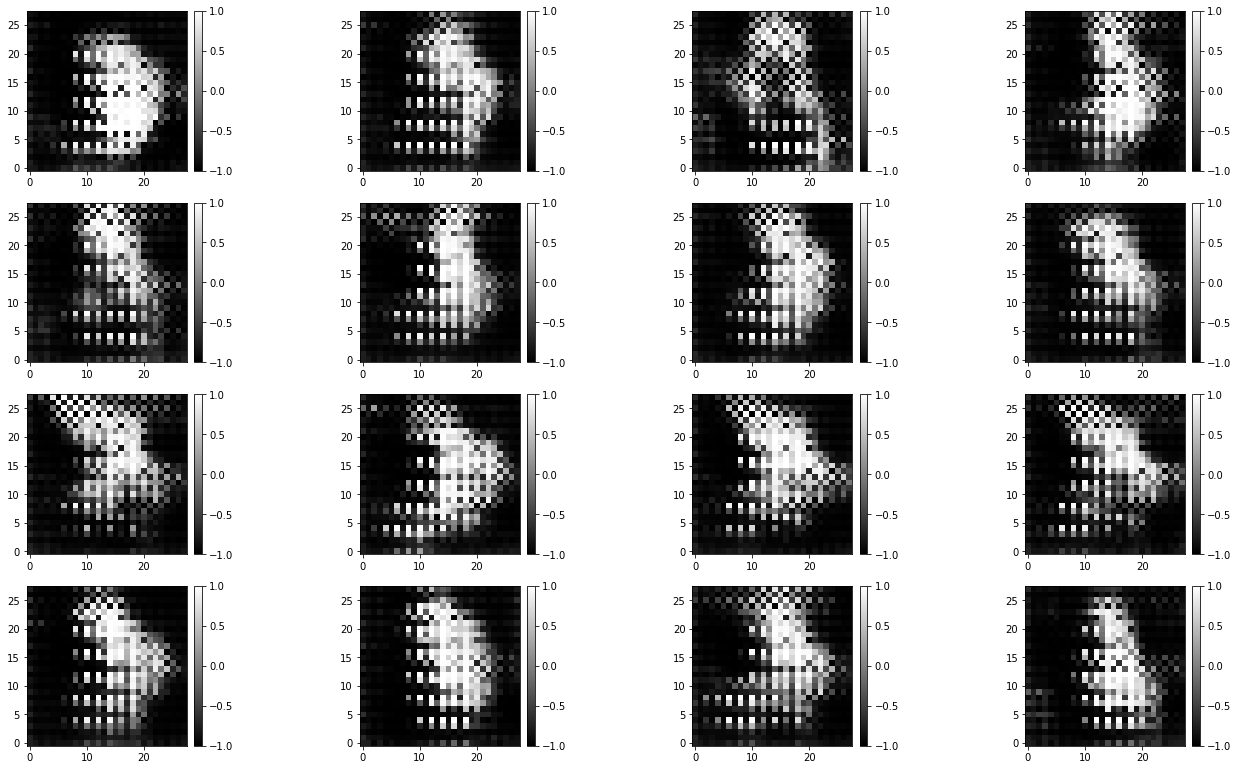

discriminator weights:[[-0.01223099]
 [ 0.0137072 ]
 [ 0.03598478]
 ...
 [ 0.00488049]
 [-0.07156642]
 [-0.0139979 ]]
gan weights:[[-0.01223099]
 [ 0.0137072 ]
 [ 0.03598478]
 ...
 [ 0.00488049]
 [-0.07156642]
 [-0.0139979 ]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.3918199 ]
 [0.45774418]
 [0.4423245 ]
 [0.38938785]
 [0.36784425]
 [0.4648408 ]
 [0.31688052]
 [0.33528215]
 [0.34115392]
 [0.41706157]
 [0.4846582 ]
 [0.32555848]
 [0.24465565]
 [0.36168993]
 [0.38570628]]
確認(fake):0.88671875
8/8 [==============================] - 0s 4ms/step
discriminator result(real):[[0.44772702]
 [0.39166123]
 [0.36951497]
 [0.40406033]
 [0.35840112]
 [0.34417066]
 [0.27949873]
 [0.37227738]
 [0.39251694]
 [0.4428786 ]
 [0.29595813]
 [0.30855817]
 [0.33737606]
 [0.42261147]
 [0.39627576]]
確認(real):0.0078125
200 
 [D loss fake:0.44783905148506165, acc fake:0.81640625] 
 [D loss real:0.308086633682251, acc real:0.90625] 
 [G loss: 1.297059416770935]
8/8 [=========

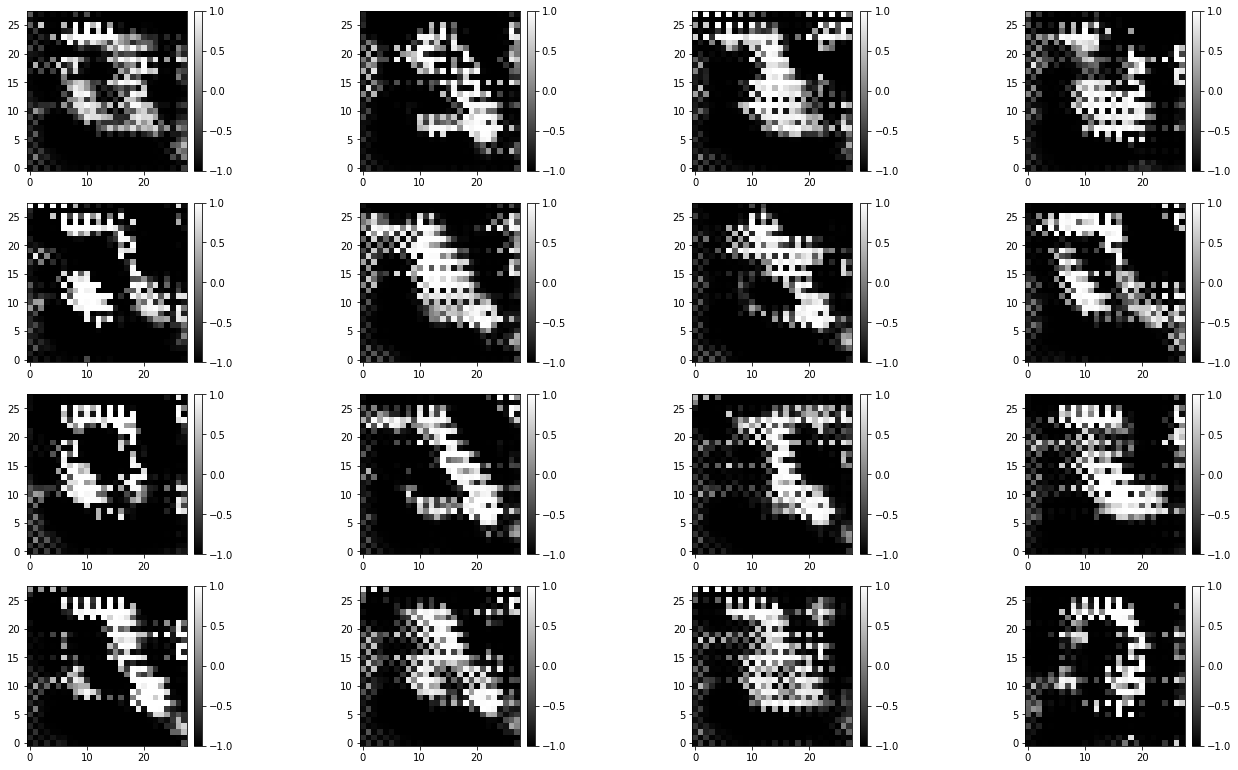

discriminator weights:[[-0.00700802]
 [ 0.01996731]
 [ 0.03673295]
 ...
 [-0.0010219 ]
 [-0.08839016]
 [-0.02579593]]
gan weights:[[-0.00700802]
 [ 0.01996731]
 [ 0.03673295]
 ...
 [-0.0010219 ]
 [-0.08839016]
 [-0.02579593]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.50729424]
 [0.51012206]
 [0.49347678]
 [0.6554425 ]
 [0.6427954 ]
 [0.50945634]
 [0.46285906]
 [0.5652075 ]
 [0.5421877 ]
 [0.48892868]
 [0.58350694]
 [0.64977014]
 [0.48833996]
 [0.69224346]
 [0.6531025 ]]
確認(fake):0.140625
8/8 [==============================] - 0s 3ms/step
discriminator result(real):[[0.35428882]
 [0.3947599 ]
 [0.34745473]
 [0.5409039 ]
 [0.28124812]
 [0.49771842]
 [0.3801058 ]
 [0.44092384]
 [0.5131715 ]
 [0.3795198 ]
 [0.42383978]
 [0.40148976]
 [0.53808784]
 [0.434608  ]
 [0.3635451 ]]
確認(real):0.24609375
300 
 [D loss fake:0.18956871330738068, acc fake:0.921875] 
 [D loss real:0.04199521988630295, acc real:1.0] 
 [G loss: 1.3905162811279297]
8/8 [=============

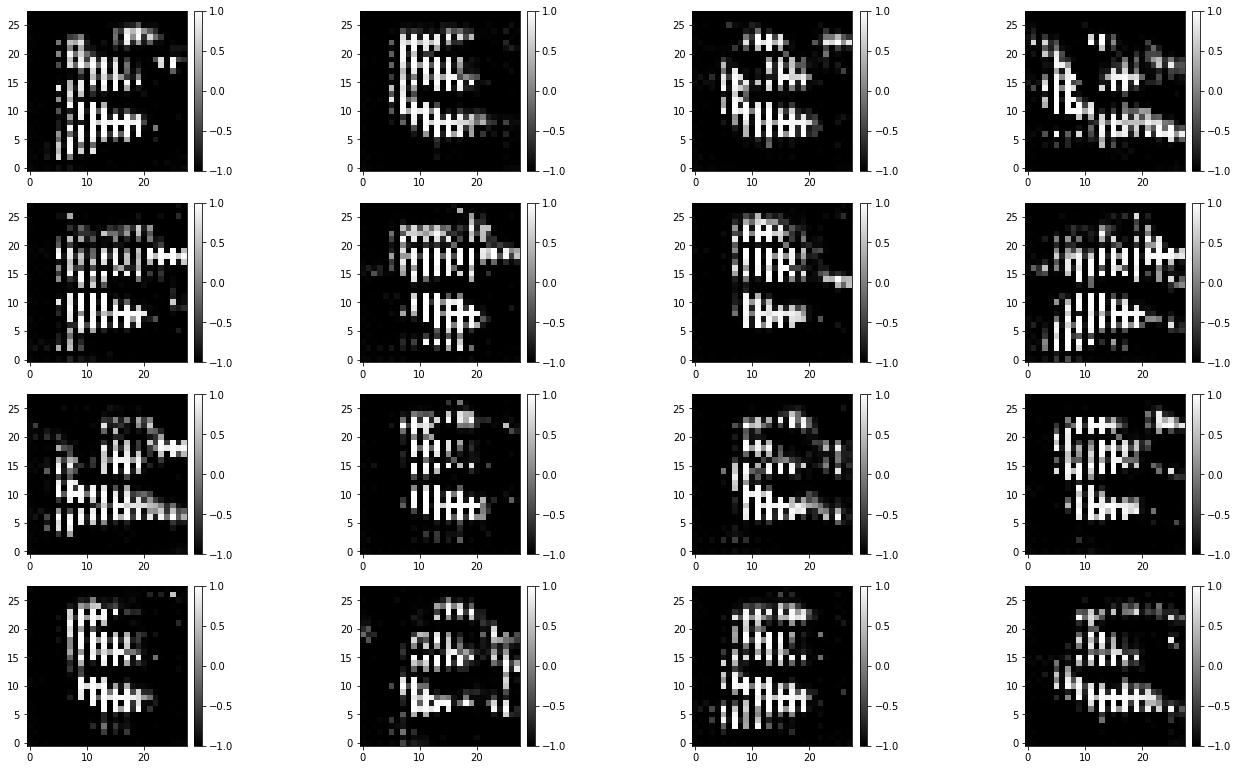

discriminator weights:[[-0.00275513]
 [ 0.02502734]
 [ 0.04071528]
 ...
 [-0.00634771]
 [-0.09442643]
 [-0.0281453 ]]
gan weights:[[-0.00275513]
 [ 0.02502734]
 [ 0.04071528]
 ...
 [-0.00634771]
 [-0.09442643]
 [-0.0281453 ]]
8/8 [==============================] - 0s 2ms/step
discriminator result(fake):[[0.11111166]
 [0.10903967]
 [0.08565916]
 [0.13111384]
 [0.09849794]
 [0.16093113]
 [0.13162376]
 [0.1198784 ]
 [0.17029655]
 [0.06684395]
 [0.08231489]
 [0.10181557]
 [0.11908529]
 [0.09839262]
 [0.07768645]]
確認(fake):1.0
8/8 [==============================] - 0s 5ms/step
discriminator result(real):[[0.06316046]
 [0.17607532]
 [0.08693627]
 [0.06669356]
 [0.04258639]
 [0.07633967]
 [0.07762066]
 [0.08825047]
 [0.15650257]
 [0.09017868]
 [0.15297753]
 [0.10095362]
 [0.08877189]
 [0.105226  ]
 [0.10646121]]
確認(real):0.0
400 
 [D loss fake:0.06334836781024933, acc fake:0.9921875] 
 [D loss real:0.18685811758041382, acc real:0.9375] 
 [G loss: 3.5870614051818848]
8/8 [=====================

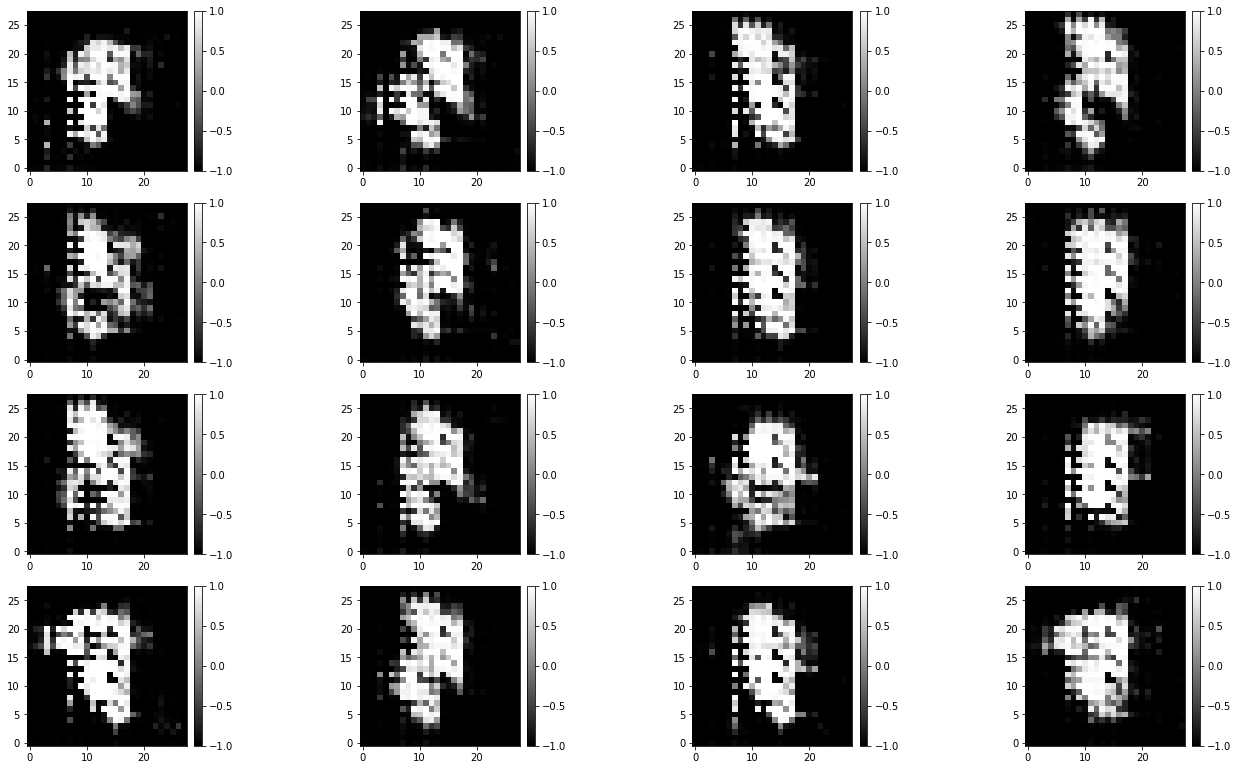

discriminator weights:[[-0.00464054]
 [ 0.02769565]
 [ 0.04091345]
 ...
 [-0.00931409]
 [-0.09631727]
 [-0.02910502]]
gan weights:[[-0.00464054]
 [ 0.02769565]
 [ 0.04091345]
 ...
 [-0.00931409]
 [-0.09631727]
 [-0.02910502]]
8/8 [==============================] - 0s 2ms/step
discriminator result(fake):[[0.04310472]
 [0.05201688]
 [0.05526082]
 [0.05848062]
 [0.05748412]
 [0.0662182 ]
 [0.09098667]
 [0.04109625]
 [0.06830607]
 [0.06917936]
 [0.07038765]
 [0.05739575]
 [0.07307825]
 [0.04987546]
 [0.06921812]]
確認(fake):1.0
8/8 [==============================] - 0s 2ms/step
discriminator result(real):[[0.04649558]
 [0.11907651]
 [0.06448458]
 [0.03304748]
 [0.0378161 ]
 [0.02667218]
 [0.07143917]
 [0.10843213]
 [0.04651329]
 [0.05834975]
 [0.11290363]
 [0.11435067]
 [0.04861826]
 [0.03891534]
 [0.08676883]]
確認(real):0.0
500 
 [D loss fake:0.2894569933414459, acc fake:0.890625] 
 [D loss real:0.39310064911842346, acc real:0.8125] 
 [G loss: 4.230217456817627]
8/8 [========================

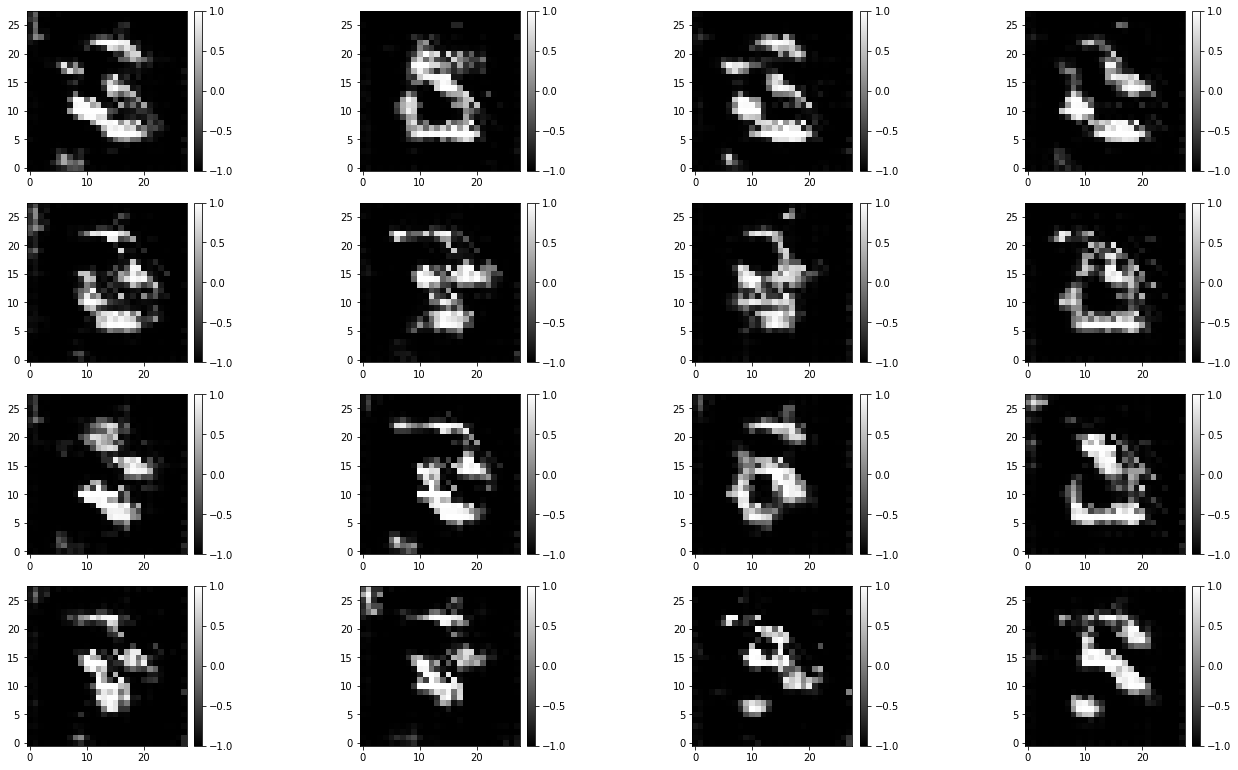

discriminator weights:[[-0.000971  ]
 [ 0.03376233]
 [ 0.04087397]
 ...
 [-0.01985039]
 [-0.09846532]
 [-0.03146893]]
gan weights:[[-0.000971  ]
 [ 0.03376233]
 [ 0.04087397]
 ...
 [-0.01985039]
 [-0.09846532]
 [-0.03146893]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.9943072 ]
 [0.98339266]
 [0.9719437 ]
 [0.9054301 ]
 [0.9827855 ]
 [0.9818586 ]
 [0.9892068 ]
 [0.96169084]
 [0.9673342 ]
 [0.9793784 ]
 [0.975631  ]
 [0.9835983 ]
 [0.9814718 ]
 [0.956256  ]
 [0.98756915]]
確認(fake):0.0
8/8 [==============================] - 0s 5ms/step
discriminator result(real):[[0.25080335]
 [0.29717043]
 [0.3281476 ]
 [0.3704626 ]
 [0.24259694]
 [0.42599568]
 [0.08667725]
 [0.09909371]
 [0.14962704]
 [0.2812939 ]
 [0.24366596]
 [0.20632958]
 [0.18108943]
 [0.32938474]
 [0.49279836]]
確認(real):0.0234375
600 
 [D loss fake:0.0004674374358728528, acc fake:1.0] 
 [D loss real:0.0017034842167049646, acc real:1.0] 
 [G loss: 0.20890632271766663]
8/8 [===================

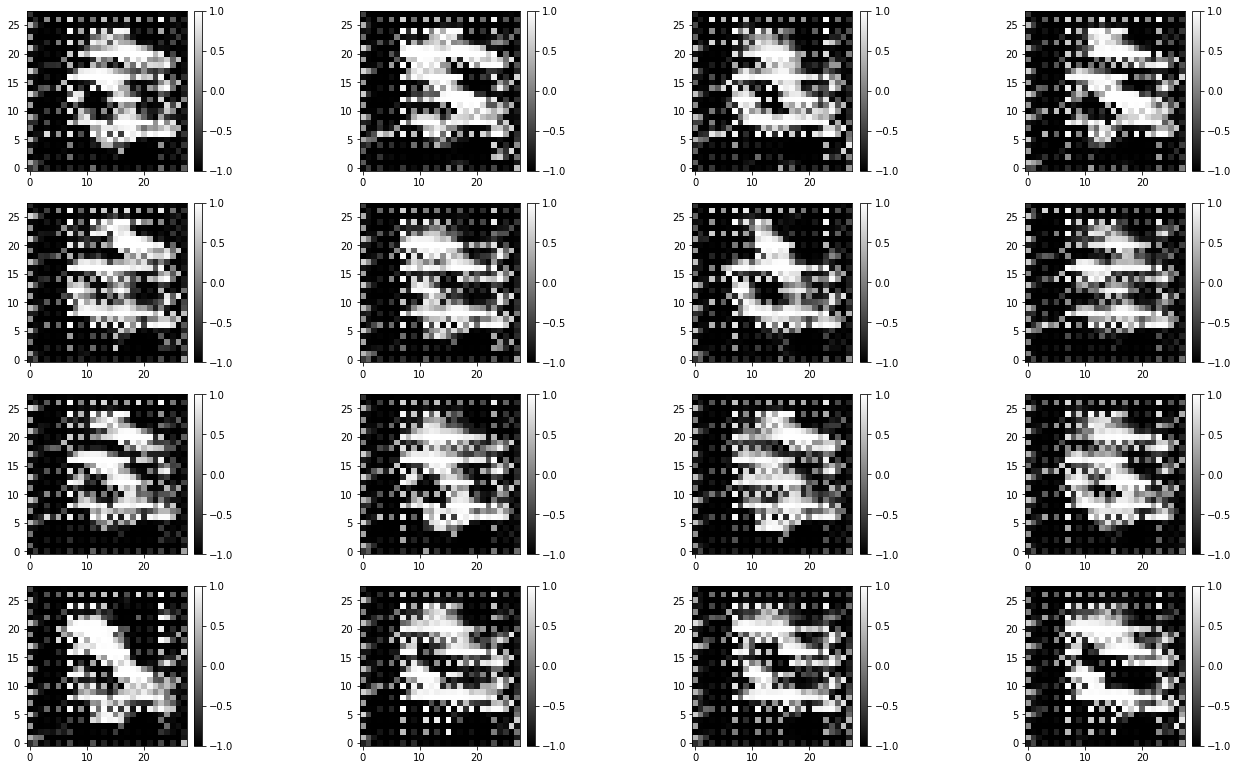

discriminator weights:[[-0.00065778]
 [ 0.03748358]
 [ 0.04123738]
 ...
 [-0.02182256]
 [-0.10348933]
 [-0.03082404]]
gan weights:[[-0.00065778]
 [ 0.03748358]
 [ 0.04123738]
 ...
 [-0.02182256]
 [-0.10348933]
 [-0.03082404]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.93875533]
 [0.94427186]
 [0.88880223]
 [0.9532625 ]
 [0.9448333 ]
 [0.896057  ]
 [0.9226581 ]
 [0.9435324 ]
 [0.9188033 ]
 [0.937536  ]
 [0.9350161 ]
 [0.94600356]
 [0.93272585]
 [0.95540446]
 [0.9281228 ]]
確認(fake):0.0
8/8 [==============================] - 0s 4ms/step
discriminator result(real):[[0.00228377]
 [0.02514107]
 [0.00994704]
 [0.00404621]
 [0.00328792]
 [0.01212128]
 [0.00269541]
 [0.0024247 ]
 [0.00363109]
 [0.01787682]
 [0.0042494 ]
 [0.00151419]
 [0.00258945]
 [0.003871  ]
 [0.00295672]]
確認(real):0.0
700 
 [D loss fake:0.005354848690330982, acc fake:1.0] 
 [D loss real:0.0036821728572249413, acc real:1.0] 
 [G loss: 0.5521289706230164]
8/8 [===========================

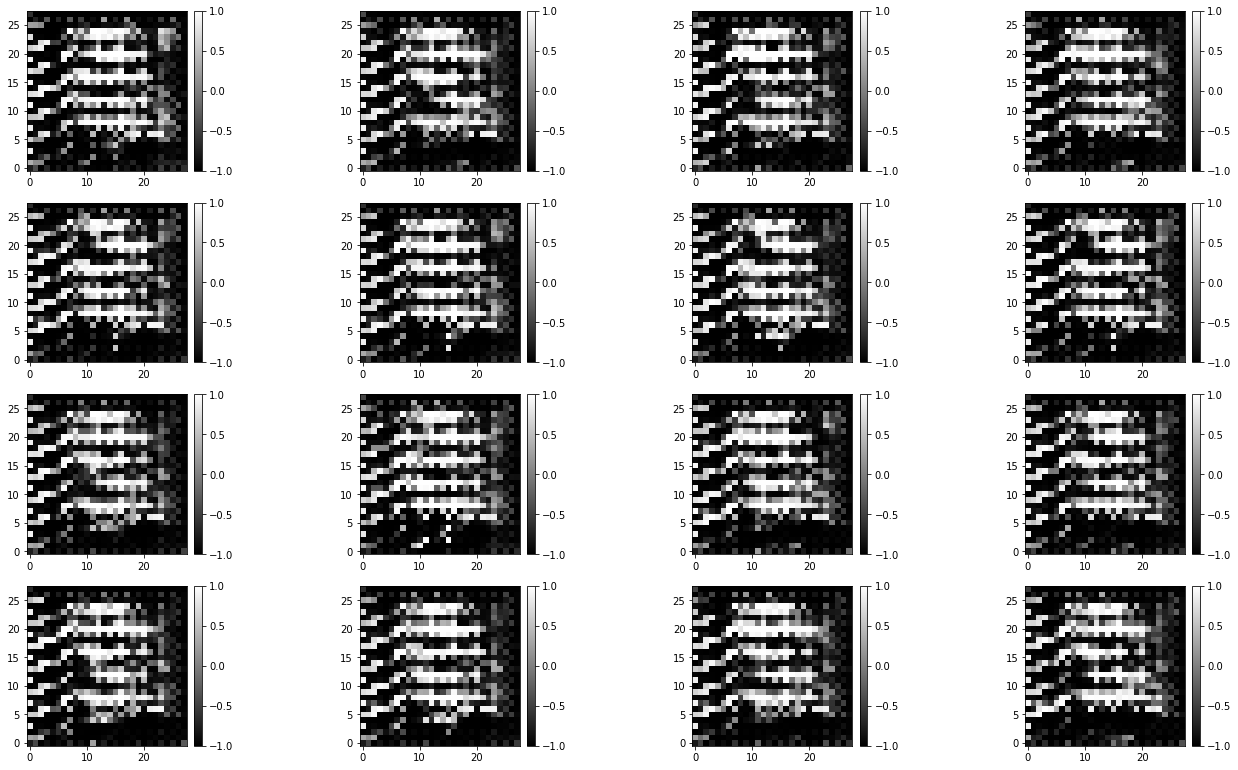

discriminator weights:[[-0.00091442]
 [ 0.03734907]
 [ 0.04113851]
 ...
 [-0.02376649]
 [-0.10554697]
 [-0.03137146]]
gan weights:[[-0.00091442]
 [ 0.03734907]
 [ 0.04113851]
 ...
 [-0.02376649]
 [-0.10554697]
 [-0.03137146]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.95559525]
 [0.95043063]
 [0.94727856]
 [0.9471324 ]
 [0.96124697]
 [0.9511626 ]
 [0.95120656]
 [0.94950897]
 [0.95590997]
 [0.9358379 ]
 [0.9551051 ]
 [0.9608618 ]
 [0.95950514]
 [0.95080733]
 [0.95752954]]
確認(fake):0.0
8/8 [==============================] - 0s 5ms/step
discriminator result(real):[[0.10748932]
 [0.05858512]
 [0.05005252]
 [0.03076661]
 [0.05365955]
 [0.04099541]
 [0.03300476]
 [0.06117727]
 [0.10346483]
 [0.08680214]
 [0.06347809]
 [0.03695602]
 [0.03333205]
 [0.06206812]
 [0.09835268]]
確認(real):0.0
800 
 [D loss fake:0.004462366923689842, acc fake:1.0] 
 [D loss real:0.002981935627758503, acc real:1.0] 
 [G loss: 1.3368514776229858]
8/8 [============================

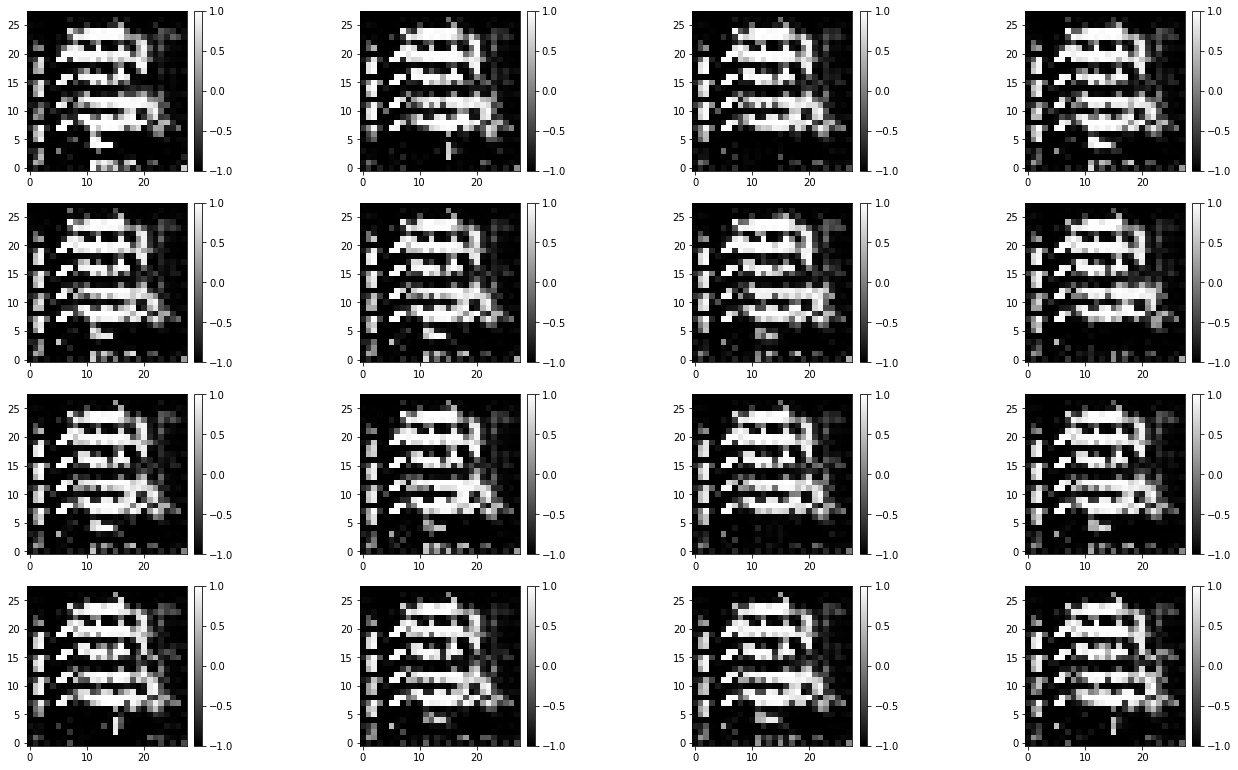

discriminator weights:[[-0.00023375]
 [ 0.03815631]
 [ 0.04196884]
 ...
 [-0.0248628 ]
 [-0.10764567]
 [-0.03218294]]
gan weights:[[-0.00023375]
 [ 0.03815631]
 [ 0.04196884]
 ...
 [-0.0248628 ]
 [-0.10764567]
 [-0.03218294]]
8/8 [==============================] - 0s 4ms/step
discriminator result(fake):[[0.95554334]
 [0.95204926]
 [0.9453261 ]
 [0.95629215]
 [0.95781666]
 [0.94861853]
 [0.95667034]
 [0.95190084]
 [0.9545909 ]
 [0.94829553]
 [0.9578904 ]
 [0.95513785]
 [0.95004815]
 [0.9436258 ]
 [0.9536069 ]]
確認(fake):0.0
8/8 [==============================] - 0s 4ms/step
discriminator result(real):[[0.26792347]
 [0.26185384]
 [0.30007505]
 [0.19272703]
 [0.19821465]
 [0.27030963]
 [0.24344318]
 [0.13145456]
 [0.05957171]
 [0.11855716]
 [0.19581223]
 [0.10162181]
 [0.2042505 ]
 [0.19587082]
 [0.2163064 ]]
確認(real):0.0
900 
 [D loss fake:0.01042455155402422, acc fake:0.99609375] 
 [D loss real:0.003857760690152645, acc real:1.0] 
 [G loss: 1.5696732997894287]
8/8 [======================

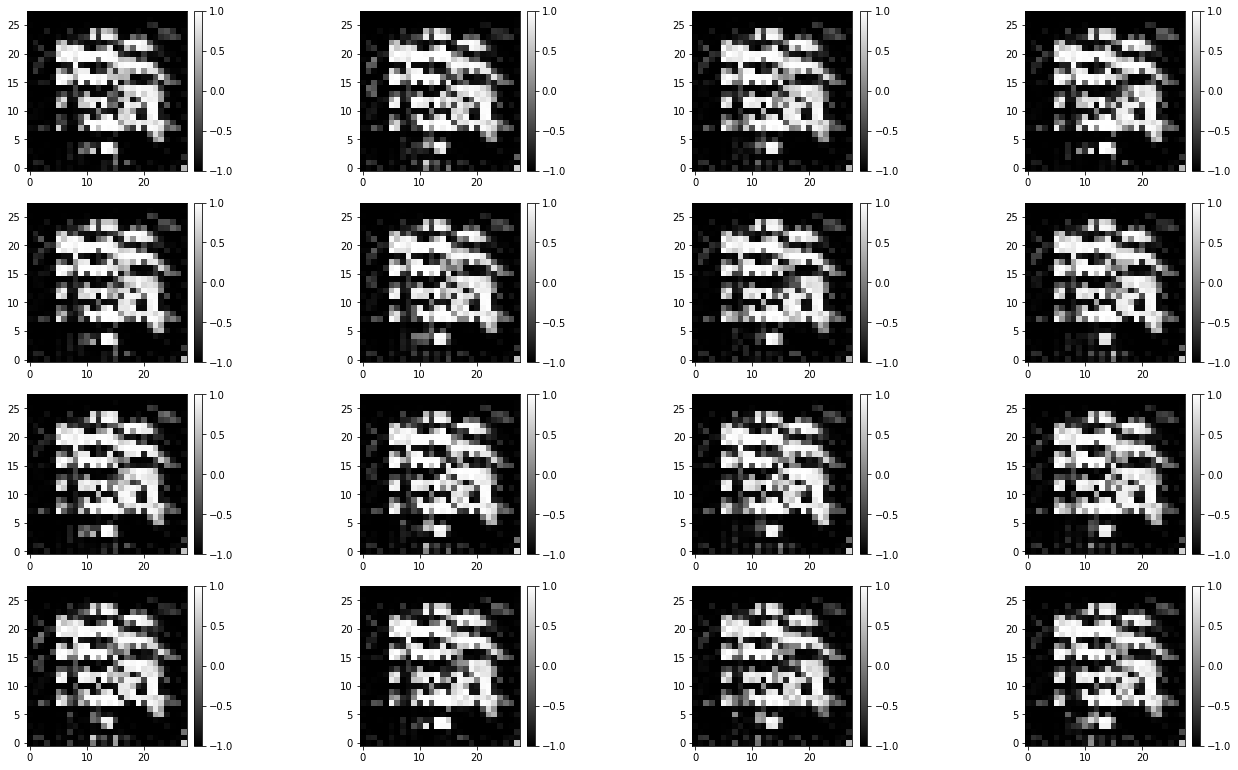

discriminator weights:[[ 5.13662962e-05]
 [ 3.84956971e-02]
 [ 4.24044840e-02]
 ...
 [-2.57030204e-02]
 [-1.09749824e-01]
 [-3.37259211e-02]]
gan weights:[[ 5.13662962e-05]
 [ 3.84956971e-02]
 [ 4.24044840e-02]
 ...
 [-2.57030204e-02]
 [-1.09749824e-01]
 [-3.37259211e-02]]
8/8 [==============================] - 0s 3ms/step
discriminator result(fake):[[0.5729653 ]
 [0.58843464]
 [0.5706089 ]
 [0.59798115]
 [0.5939443 ]
 [0.6331959 ]
 [0.5517884 ]
 [0.58540314]
 [0.61013323]
 [0.56263727]
 [0.601722  ]
 [0.6330384 ]
 [0.64102733]
 [0.6260582 ]
 [0.61959916]]
確認(fake):0.0
8/8 [==============================] - 0s 3ms/step
discriminator result(real):[[0.03013845]
 [0.03192751]
 [0.03118023]
 [0.01317843]
 [0.0239011 ]
 [0.04227399]
 [0.05843524]
 [0.02979722]
 [0.03918272]
 [0.03076709]
 [0.07710799]
 [0.03226592]
 [0.031114  ]
 [0.03859303]
 [0.01791188]]
確認(real):0.0
1000 
 [D loss fake:0.013721267692744732, acc fake:1.0] 
 [D loss real:0.017136750742793083, acc real:0.99609375] 
 [G los

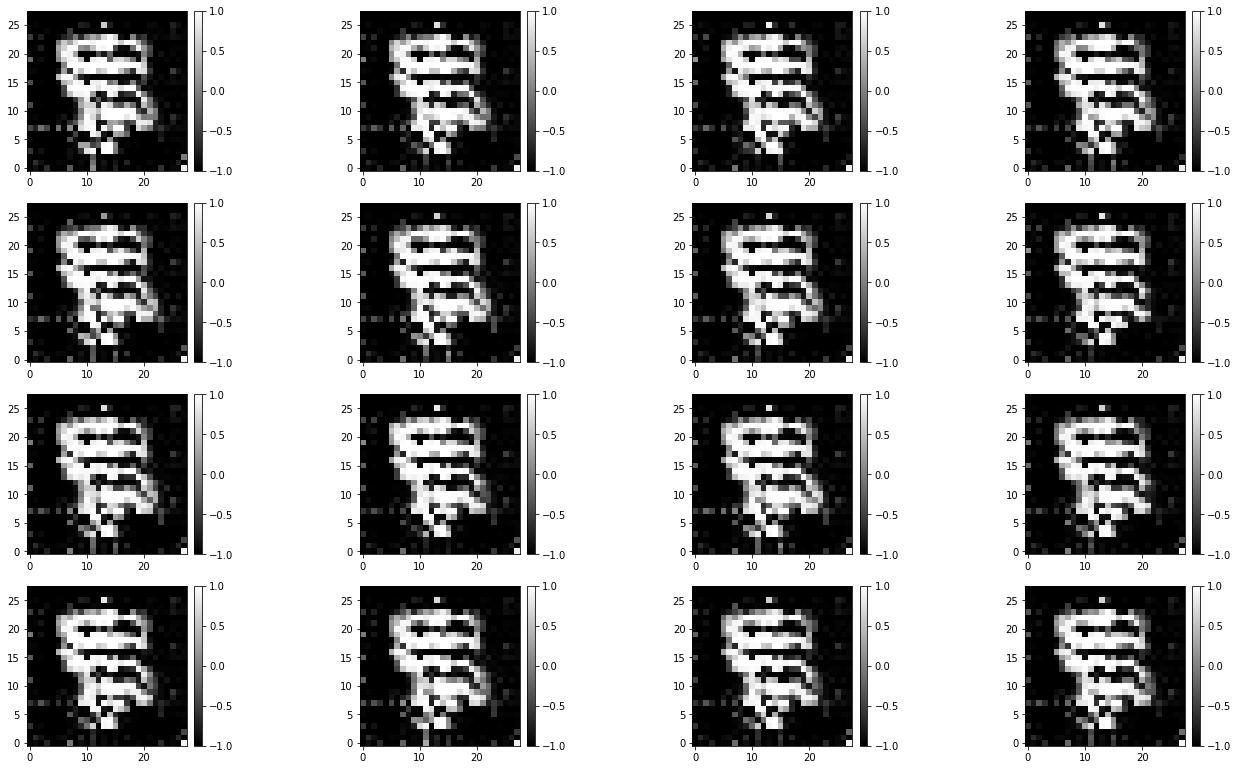

discriminator weights:[[-0.0005708 ]
 [ 0.03902841]
 [ 0.04180222]
 ...
 [-0.02641936]
 [-0.11220638]
 [-0.03571642]]
gan weights:[[-0.0005708 ]
 [ 0.03902841]
 [ 0.04180222]
 ...
 [-0.02641936]
 [-0.11220638]
 [-0.03571642]]


KeyboardInterrupt: 

In [160]:
#ハイパーパラメータ設定
iterations = 20000
batch_size = 256#訓練を行うバッチサイズ指定
sample_interval = 100
train(train_data = x_train, input_dim=ran_normal_dim, iterations=iterations, batch_size=batch_size, sample_interval=sample_interval)

In [120]:
#tensorflow用
# Build the Generator
generator = build_generator(ran_normal_dim)
generator.summary()

# Keep Discriminator’s parameters constant for Generator training
discriminator = build_discriminator(img_shape)
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.summary()

# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.trainable = True
discriminator.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 12544)             263424    
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 14, 14, 128)      295040    
 Transpose)                                                      
                                                                 
 batch_normalization_60 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_79 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_34 (Conv2D  (None, 14, 14, 64)     

In [121]:
#train_on_batchを使用しない，tensorflow的な書き方
def train_step(model, criterion, metrics, optimizer, x, y):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = criterion(y, preds)
        acc = metrics(y, preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss, acc

In [122]:
#tensorflow用ハイパーパラメータ
criterion = losses.BinaryCrossentropy()
optimizer_d = optimizers.Adam(learning_rate=0.001)
optimizer_g = optimizers.Adam(learning_rate=0.001)
metrics_d = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
metrics_d_r = tf.keras.metrics.BinaryAccuracy(threshold=0.5)#ここで指定するとまず上手く行かないが，train_step関数内で指定すると上手く行く(親クラスの影響を受けている？謎)この問題があると，lossなども上手く更新できているのかわからなくなってきた．
metrics_c = tf.keras.metrics.BinaryAccuracy(threshold=0.5)

In [125]:
#train_on_batchを使用しない，tensorflow的な書き方
losses_check = []
accuracies_check = []
iteration_checkpoints = []


def train(train_data, input_dim, iterations, batch_size, sample_interval):

# #     Labels for real images: all ones
#     real = np.ones((batch_size, 1))

# #     Labels for fake images: all zeros
#     fake = np.zeros((batch_size, 1))

#     # Labels for real images: all ones
#     real = np.ones(batch_size)

#     # Labels for fake images: all zeros
#     fake = np.zeros(batch_size)

#     Labels for real images: all ones
    real = tf.constant(1, shape=[batch_size, 1])

#     Labels for fake images: all zeros
    fake = tf.constant(0, shape=[batch_size, 1])

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------
        
        if (iteration % 2 == 0):
            # Get a random batch of real images
            idx = np.random.randint(0, train_data.shape[0], batch_size)
            imgs = train_data[idx]

            # Generate a batch of fake images
            z = tf.random.normal(shape=[batch_size, input_dim])
            gen_imgs = generator(z)

            # Train Discriminator
            d_loss_real = train_step(model=discriminator, criterion=criterion, optimizer=optimizer_d, metrics=metrics_d, x=imgs, y=real)
            metrics_d.reset_state()
            d_loss_fake = train_step(model=discriminator, criterion=criterion, optimizer=optimizer_d, metrics=metrics_d, x=gen_imgs, y=fake)
            metrics_d.reset_state()
#             d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

#         # Generate a batch of fake images
#         z = tf.random.normal(shape=[batch_size, input_dim])

#         # Train Generator
#         g_loss = train_step(model=gan, criterion=criterion, x=z, y=real)
        


        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
#             losses_check.append((d_loss, g_loss))
#             accuracies_check.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output result
            d_pred = discriminator(gen_imgs, training=False)
            print(f"discriminator result(fake):{d_pred[:20,:]}")
#             m = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
#             m.update_state(fake, d_pred)
            print(f"acc 確認(fake):{metrics_d(fake, d_pred)}")
            d_pred = discriminator(imgs, training=False)
            print(f"discriminator result(real):{d_pred[:20,:]}")
#             m = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
#             m.update_state(real, d_pred)
            print(f"acc 確認(real):{metrics_d(real, d_pred)}")
#             gan_pred = gan.predict(z)
#             print(f"gan discriminator result(fake):{gan_pred[:,:]}")

            # Output training progress
#             print(f"{iteration + 1} \n [D loss fake:{d_loss_fake[0]}, acc fake:{d_loss_fake[1]}] \n [D loss real:{d_loss_real[0]}, acc real:{d_loss_real[1]}] \n [G loss: {g_loss}]")
            print(f"{iteration + 1} \n [D loss fake:{d_loss_fake[0]}, acc fake:{d_loss_fake[1]}] \n [D loss real:{d_loss_real[0]}, acc real:{d_loss_real[1]}] \n ")

            
            # Output a sample of generated image
            gen_imgs = generator(z, training=False)
            gen_imgs_3D = gen_imgs.numpy().reshape(-1 , img_rows, img_columns)
            show_mod.show_images(gen_imgs_3D, row=4, column=4, cmap=cmap, cbar=True)
            
            #重みの監視
            print(f"discriminator weights:{discriminator.layers[11].get_weights()[0]}")
            print(f"gan weights:{gan.layers[1].layers[11].get_weights()[0]}")

In [99]:
discriminator.metrics_names
gan.metrics_names

[]

In [100]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(real, d_pred)
m.result().numpy()

NameError: name 'real' is not defined

In [101]:
# def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

#     # Sample random noise
#     z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, ran_normal_dim))

#     # Generate images from random noise
#     gen_imgs = generator.predict(z)

#     # Rescale image pixel values to [0, 1]
#     gen_imgs = 0.5 * gen_imgs + 0.5

#     # Set image grid
#     fig, axs = plt.subplots(image_grid_rows,
#                             image_grid_columns,
#                             figsize=(4, 4),
#                             sharey=True,
#                             sharex=True)

#     cnt = 0
#     for i in range(image_grid_rows):
#         for j in range(image_grid_columns):
#             # Output a grid of images
#             axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
#             axs[i, j].axis('off')
#             cnt += 1

d loss [1.4303820133209229, 0.109375]
d loss [0.2307504415512085, 0.9921875]
d loss [0.1741751730442047, 0.98046875]
d loss [0.2669215798377991, 0.9609375]
d loss [0.45444345474243164, 0.80859375]
d loss [0.7186340093612671, 0.58984375]
d loss [0.7644741535186768, 0.515625]
d loss [0.7774105072021484, 0.48046875]
d loss [0.5064510703086853, 0.73828125]
d loss [0.39411649107933044, 0.8359375]
d loss [0.3660176396369934, 0.86328125]
d loss [0.2535625696182251, 0.9375]
d loss [0.2720811367034912, 0.90234375]
d loss [0.2749241590499878, 0.93359375]
d loss [0.31632930040359497, 0.8984375]
d loss [0.33721479773521423, 0.87109375]
d loss [0.36961740255355835, 0.859375]
d loss [0.3559485971927643, 0.85546875]
d loss [0.4236544370651245, 0.8359375]
d loss [0.5863486528396606, 0.69921875]
d loss [0.748262345790863, 0.60546875]
d loss [0.927294135093689, 0.43359375]
d loss [0.8997365832328796, 0.5]
d loss [0.6552007794380188, 0.6328125]
d loss [0.46775349974632263, 0.7734375]
d loss [0.2536722421

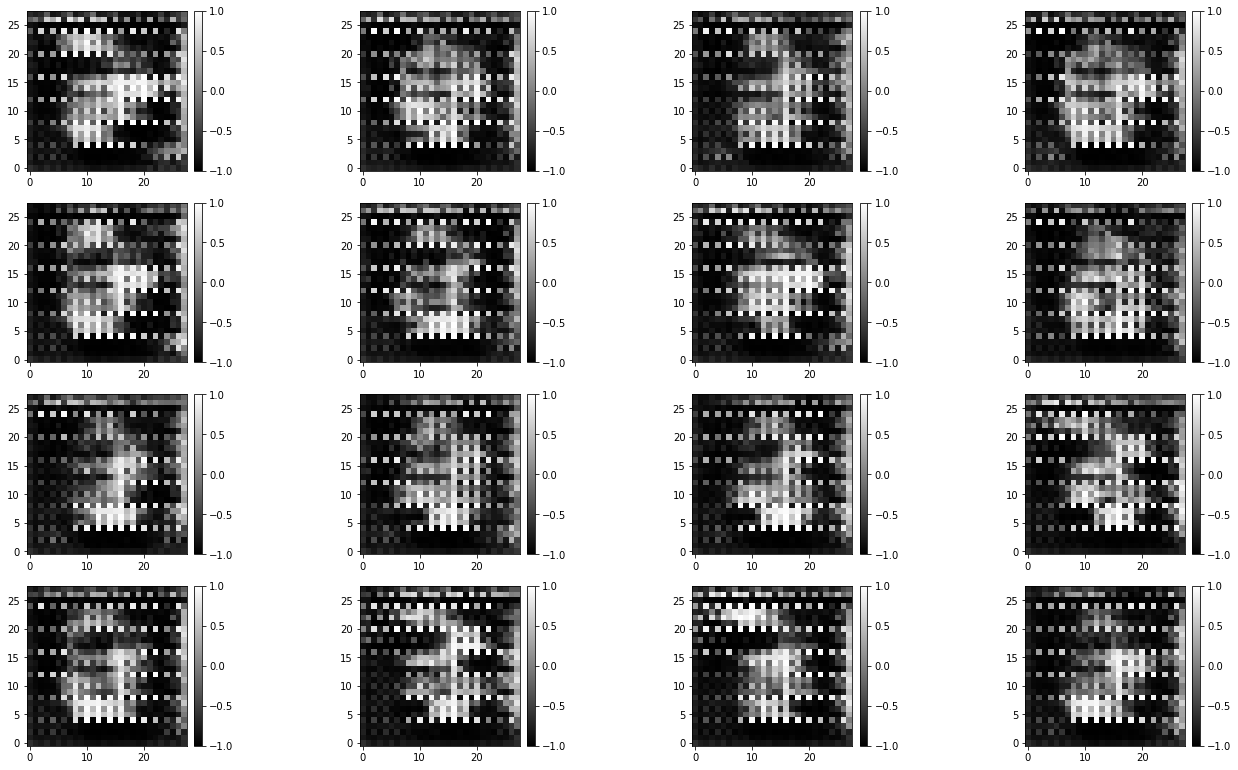

discriminator weights:[[ 0.00746856]
 [-0.01988495]
 [-0.03946177]
 ...
 [ 0.06044526]
 [-0.02634106]
 [ 0.04448951]]
gan weights:[[ 0.00746856]
 [-0.01988495]
 [-0.03946177]
 ...
 [ 0.06044526]
 [-0.02634106]
 [ 0.04448951]]
d loss [0.08052083104848862, 0.98828125]
d loss [0.10225751996040344, 0.97265625]
d loss [0.138846293091774, 0.96484375]
d loss [0.16251230239868164, 0.9375]
d loss [0.17627136409282684, 0.953125]
d loss [0.22608831524848938, 0.92578125]
d loss [0.30247464776039124, 0.90234375]
d loss [0.3359071910381317, 0.859375]
d loss [0.5375643968582153, 0.7578125]
d loss [0.728066623210907, 0.609375]
d loss [0.6982400417327881, 0.66015625]
d loss [0.5433761477470398, 0.7265625]
d loss [0.42816653847694397, 0.828125]
d loss [0.42619895935058594, 0.82421875]
d loss [0.48085838556289673, 0.76953125]
d loss [0.5338457226753235, 0.74609375]
d loss [0.4707871377468109, 0.7734375]
d loss [0.3801828920841217, 0.78125]
d loss [0.3509214222431183, 0.84765625]
d loss [0.173546358942985

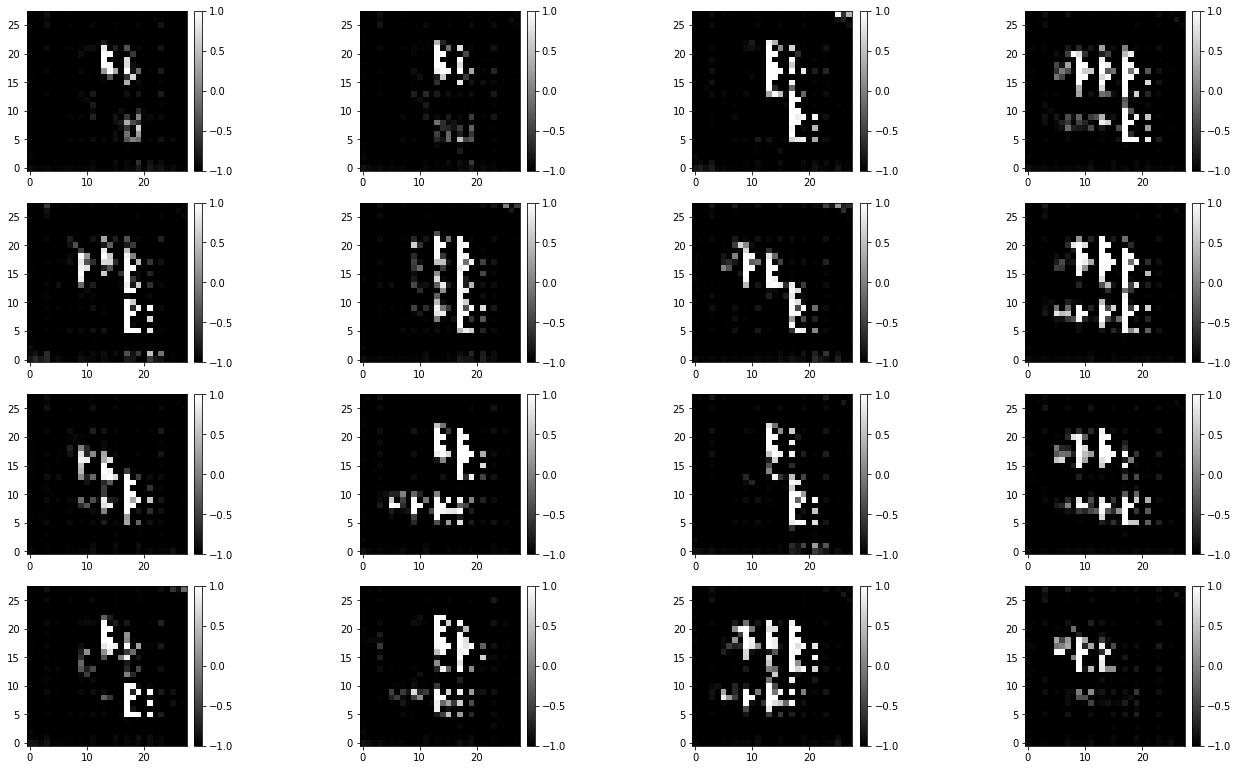

discriminator weights:[[ 0.00375716]
 [-0.02403687]
 [-0.04246011]
 ...
 [ 0.06371492]
 [-0.02501647]
 [ 0.04867408]]
gan weights:[[ 0.00375716]
 [-0.02403687]
 [-0.04246011]
 ...
 [ 0.06371492]
 [-0.02501647]
 [ 0.04867408]]
d loss [0.17062459886074066, 0.93359375]
d loss [0.1857624351978302, 0.94921875]
d loss [0.31711819767951965, 0.859375]
d loss [0.3482000529766083, 0.85546875]
d loss [0.3177545368671417, 0.859375]
d loss [0.46706098318099976, 0.7578125]
d loss [0.4397398829460144, 0.83984375]
d loss [0.43538355827331543, 0.8046875]
d loss [0.3638869822025299, 0.8359375]
d loss [0.3860780894756317, 0.83203125]
d loss [0.8783816695213318, 0.55078125]
d loss [1.7990601062774658, 0.26171875]
d loss [1.7077304124832153, 0.30078125]
d loss [0.9729423522949219, 0.54296875]
d loss [0.6849108338356018, 0.65625]
d loss [0.5628782510757446, 0.7109375]
d loss [0.47036248445510864, 0.78515625]
d loss [0.39873912930488586, 0.84375]
d loss [0.40280455350875854, 0.84765625]
d loss [0.41181600093

KeyboardInterrupt: 

In [140]:
#ハイパーパラメータ設定
iterations = 20000
batch_size = 256#訓練を行うバッチサイズ指定
sample_interval = 100
train(train_data = x_train, input_dim=ran_normal_dim, iterations=iterations, batch_size=batch_size, sample_interval=sample_interval)

### 感染確率分布に導入

In [ ]:
#生成器に与えるランダムな数列
ran_normal_dim = 100

In [ ]:
#DCGANの生成器
def build_generator(input_dim):
    model = keras.Sequential()
    
    #全結合層と形状直し
    model.add(Dense(256 * 7 * 7, input_dim=input_dim))
    model.add(Reshape((7, 7, 256)))
    
    #転置畳み込み層１
    model.add(Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層2
    model.add(Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層3
    model.add(Conv2DTranspose(16, kernel_size=(3,3), strides=(2,3), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層4
    model.add(Conv2DTranspose(8, kernel_size=(5,5), strides=(1,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層5
    model.add(Conv2DTranspose(8, kernel_size=(3,4), strides=(1,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    
    #転置畳み込み層6
    model.add(Conv2DTranspose(1, kernel_size=(4,5), strides=(1,1)))
    model.add(Activation("tanh"))
    
    model.summary()
    return model

In [ ]:
#DCGANの識別器
def build_discriminator(input_dim):
    model = keras.Sequential()
    
    #28*28*1の画像を14*14*32のテンソルにする畳み込み層
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=input_dim, padding="same"))
    model.add(LeakyReLU(alpha=0.01))

    #畳み込み層
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=input_dim, padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    #畳み込み層
    model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=input_dim, padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    #画像の真偽予測を行うシグモイド関数
    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.summary()
    return model

In [ ]:
#DCGANの構築
def build_gan(generator, discriminator):

    model = keras.Sequential()

    #生成器と識別器を組み合わせる
    model.add(generator)
    model.add(discriminator)

    return model

In [ ]:
#識別器の構築とコンパイル
optimizer = optimizers.Adam(learning_rate=0.001)
# discriminator = build_discriminator([max_num_row, max_num_column, 1])
discriminator = build_discriminator(img_shape)
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#生成器の構築
generator = build_generator(ran_normal_dim)
#生成器の訓練中は識別器の重みやバイアスなどのパラメータは固定する
discriminator.trainable = False
#識別器を固定したまま生成器を訓練する
gan = build_gan(generator, discriminator)
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

In [ ]:
#target 2D to 3D
train_target_2D = train_target.to_numpy()
train_target_3D = train_target_2D.reshape(-1, max_num_row, max_num_column, 1)
test_target_2D = test_target.to_numpy()
test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column, 1)
test_target_3D.shape

(95, 65, 95, 1)

In [ ]:
np_output_2D = df_output_2D.to_numpy()
np_output_3D = np_output_2D.reshape(-1, max_num_row, max_num_column, 1)
np_output_3D.shape

(263, 65, 95, 1)

In [ ]:
#トレーニング
losses = []
accuracies = []
iteration_checkpoints = []

def train(train_data, iterations, batch_size, sample_interval):

    #本物と偽物のラベル
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        """
        識別器の学習
        """

        #トレーニングデータから訓練に使用するミニバッチを作成
        idx = np.random.randint(0, train_data.shape[0], batch_size)#トレーニングデータ全体からランダムにバッチサイズ分のデータを取ってくる
        imgs = train_data[idx]

        #生成器に与えるランダムな数列
        ran_normal = np.random.normal(0, 1, (batch_size, ran_normal_dim))
        gen_imgs = generator.predict(ran_normal)

        #識別器の学習(train_on_batchは全てのデータを用いて学習するのではなく追加したデータのみ用いて学習を行う)
        #train_on_batchは戻り値として学習の損失を表すスカラー値を返す(今回はlossとmetricsに指定したaccuracyのスカラー値のリスト)
        discriminator_loss_real = discriminator.train_on_batch(imgs, real)#本物の画像から本物のラベルであるとシグモイド関数によって予測する
        discriminator_loss_fake = discriminator.train_on_batch(gen_imgs, fake)#偽物の画像から偽物のラベルであるとシグモイド関数によって予測する
        #本物の画像を本物，偽物の画像を偽物と判断できれば下の値は良くなる
        #discriminator_loss_real,fakeには[loss, accuracy]が入っておりそれらの平均を取っている
        discriminator_loss, accuracy = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        """
        生成器の学習
        """

        #生成器に与えるランダムな数列
        ran_normal = np.random.normal(0, 1, (batch_size, ran_normal_dim))
        gen_imgs = generator.predict(ran_normal)

        #生成器の学習
        #ganの学習は識別器を止めた状態で訓練を行うため実質生成器のみ訓練している
        #偽物の画像を与えてそれに対して識別器が本物であると判断するように訓練する
        generator_loss = gan.train_on_batch(ran_normal, real)
        
        #一定の学習毎に結果出力
        if (iteration + 1) % sample_interval == 0:

            #損失と正解値の保存(iterationは0から始まるが訓練ステップとしては1からの方が分かりやすいので+1)
            losses.append((discriminator_loss, generator_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            #学習結果の出力
            print("%d [Discriminator loss: %f, accuracy: %.2f%%][Generator loss: %f]"%(iteration + 1, discriminator_loss, 100.0 * accuracy, generator_loss))

            #生成したサンプル画像出力
            ran_normal = np.random.normal(0, 1, (batch_size, ran_normal_dim))
            gen_imgs = generator.predict(ran_normal)
            # gen_imgs_3D = gen_imgs.reshape(-1 , max_num_row, max_num_column)
            gen_imgs_3D = gen_imgs.reshape(-1 , img_rows, img_columns)
            show_mod.show_images(gen_imgs_3D, row=4, column=4, cmap=cmap, cbar=True)

In [ ]:
#ハイパーパラメータ設定
iterations = 20000
batch_size = 64#訓練を行うバッチサイズ指定
sample_interval = 1000
train(train_data = np_output_3D, iterations=iterations, batch_size=batch_size, sample_interval=sample_interval)

In [ ]:
#ハイパーパラメータ設定
iterations = 10000
batch_size = 64#訓練を行うバッチサイズ指定
sample_interval = 1000
train(train_data = test_target_3D, iterations=iterations, batch_size=batch_size, sample_interval=sample_interval)

In [ ]:
#ハイパーパラメータ設定
iterations = 10000
batch_size = train_data.shape[0]#訓練を行うバッチサイズ指定
sample_interval = 1000
train(iterations=iterations, batch_size=batch_size, sample_interval=sample_interval)

# 学習結果の評価

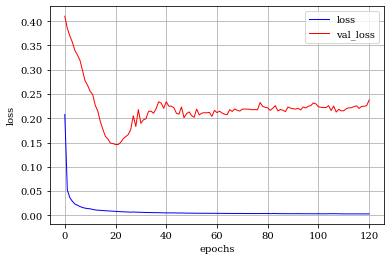

In [ ]:
#誤差関数の推移を見てみる
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

fig = plt.figure()
plt.rc("font", family="serif")
plt.plot(range(len(loss)), loss, color="blue", linewidth=1, label="loss")
plt.plot(range(len(val_loss)), val_loss, color="red", linewidth=1, label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid()
plt.show()

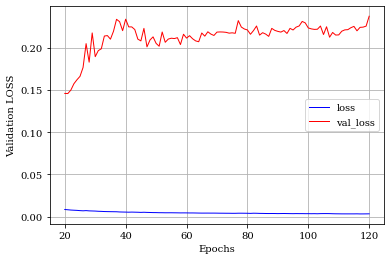

In [ ]:
#初めの数エポックの値が大きいのでそこを除いてみる
trim_position = 20
trim_loss_history = loss[trim_position:]
trim_val_loss_history = val_loss[trim_position:]
plt.plot(range(trim_position, len(trim_loss_history) + trim_position), trim_loss_history, "-b", linewidth=1, label="loss")
plt.plot(range(trim_position, len(trim_val_loss_history) + trim_position), trim_val_loss_history, "-r", linewidth=1, label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Validation LOSS")
plt.legend(loc="best")
plt.grid()
plt.show()

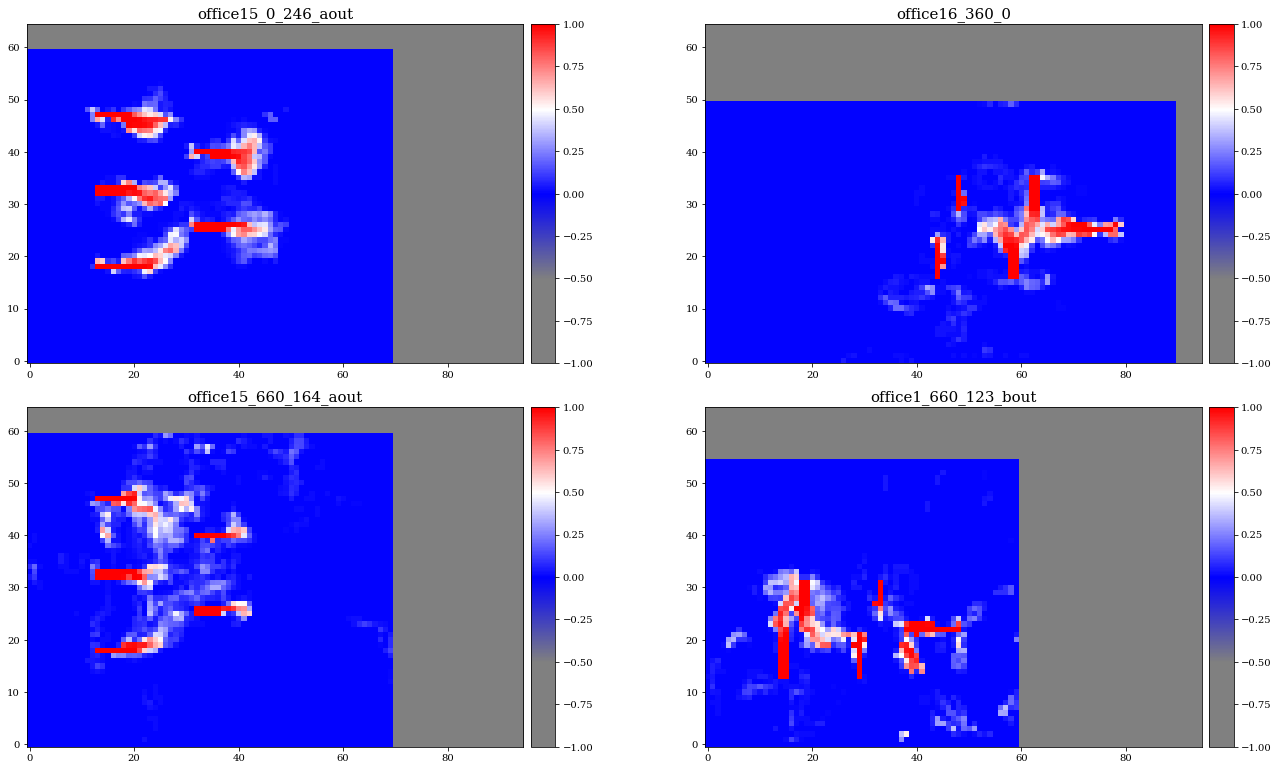

In [ ]:
#トレーニングデータの正解値の出力
train_target_2D = train_target.to_numpy()
train_target_3D = train_target_2D.reshape(-1 , max_num_row, max_num_column)
show_mod.show_images(train_target_3D,title_name=train_target.index, row=2, column=2, cmap=cmap, cbar=True)

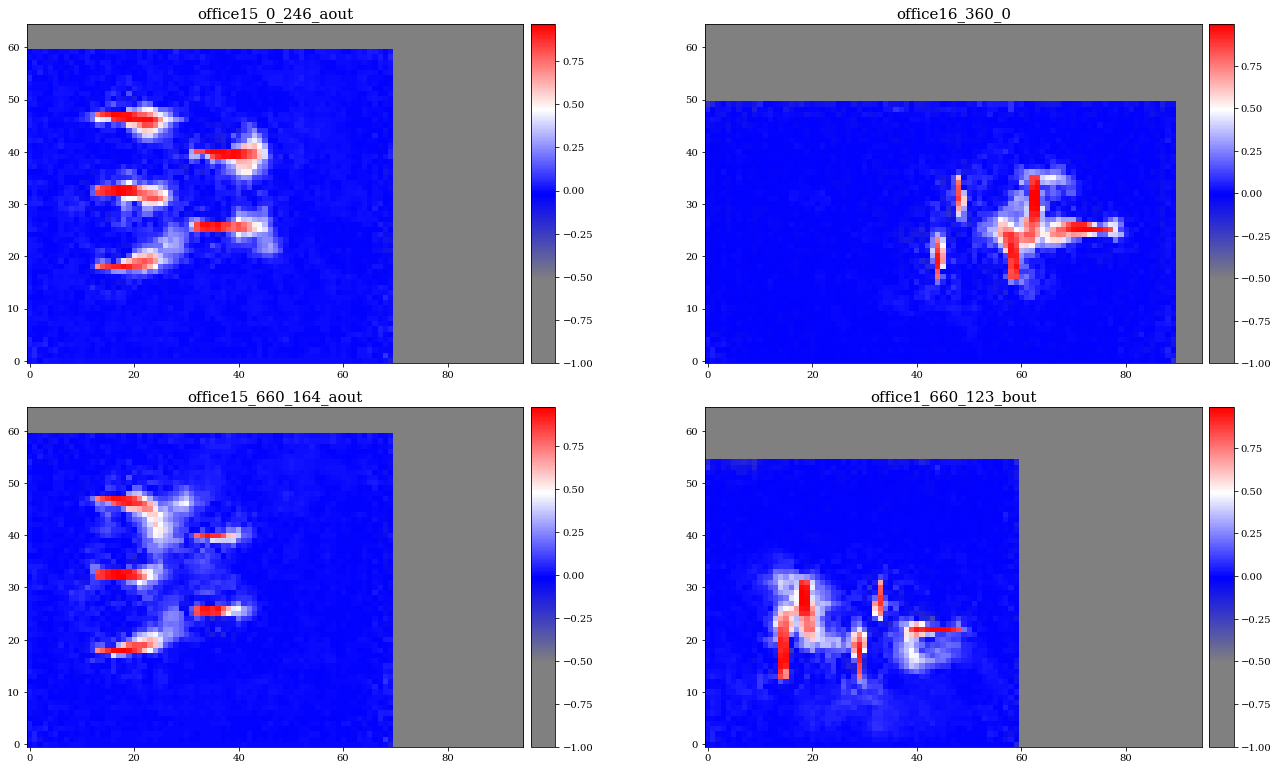

In [ ]:
#トレーニングデータの予測値の出力
predict_2D = model.predict(train_data, verbose=0)
predict_3D = predict_2D.reshape(-1 , max_num_row, max_num_column)
show_mod.show_images(predict_3D,title_name=train_target.index, row=2, column=2, cmap=cmap, cbar=True)

In [ ]:
predict_3D[1].max()

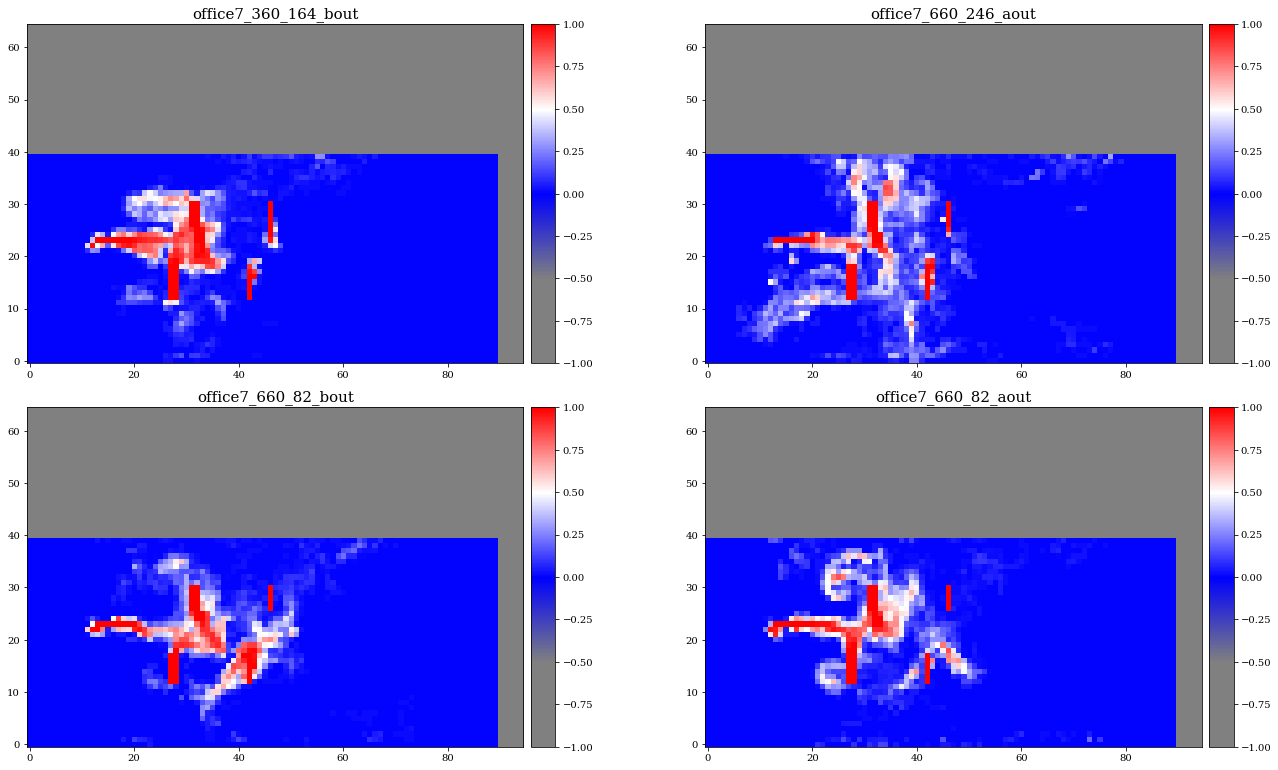

In [ ]:
#テストデータの正解値の出力
test_target_2D = test_target.to_numpy()
test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(test_target_3D,title_name=test_target.index, row=2, column=2, cmap=cmap, cbar=True)

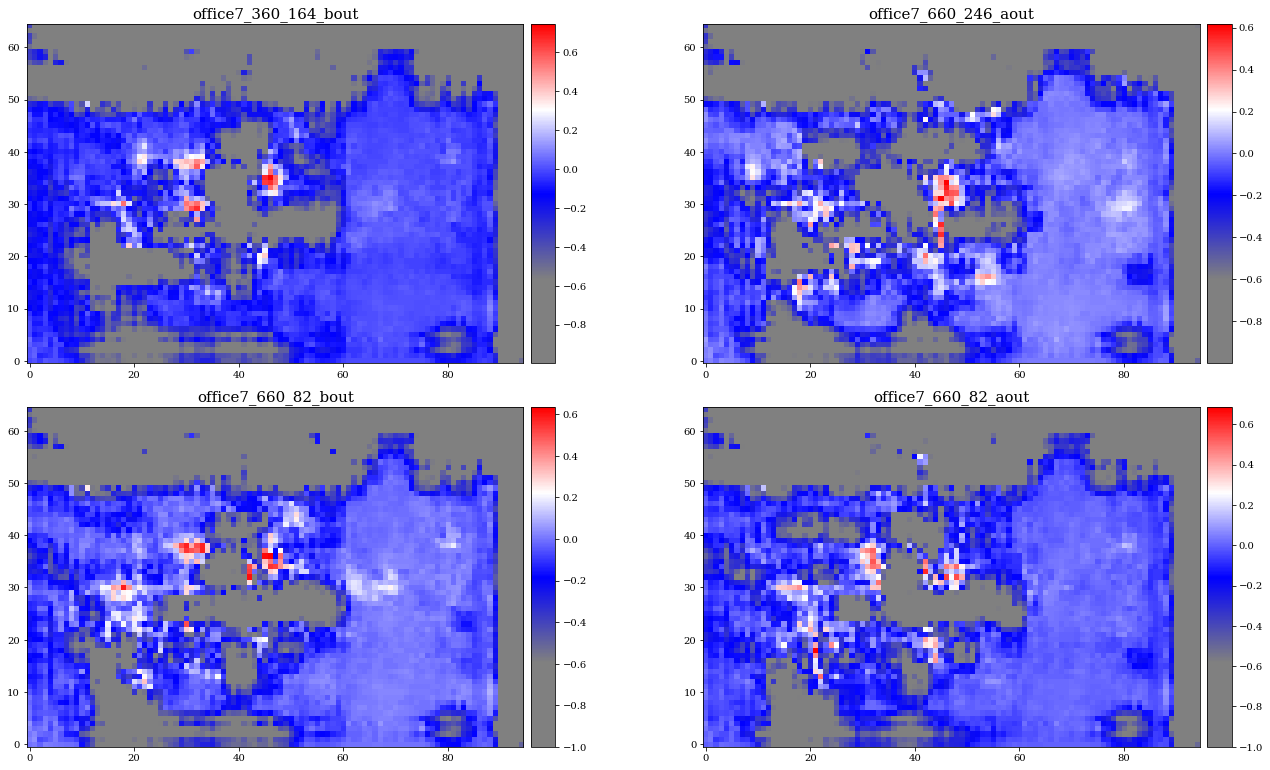

In [ ]:
#テストデータの予測値の出力
predict_2D = model.predict(test_data, verbose=0)
predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(predict_3D,title_name=test_target.index, row=2, column=2, cmap=cmap, cbar=True)